# TP1 : DIANE Ibrahim

In [1]:
import random as rd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
y[y == 0] = -1
print(y)

[-1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1
 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


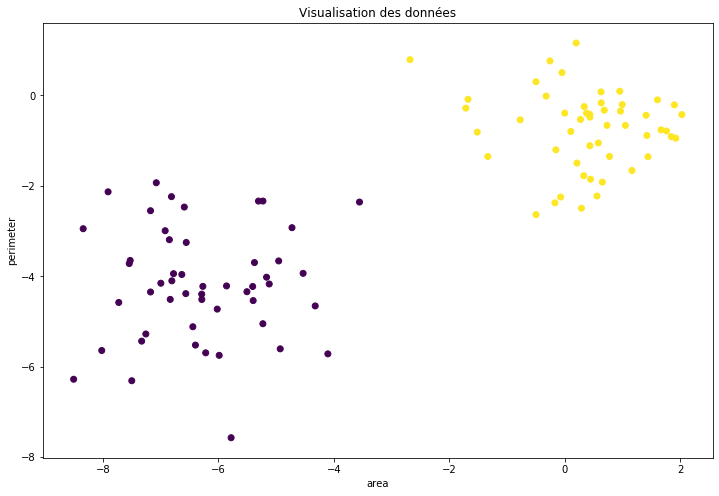

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Visualisation des données')
plt.xlabel('area')
plt.ylabel('perimeter')
plt.show()

In [35]:
def err_adal(x, r, t):
    S = np.dot(x,t)
    erreur = r - S
    return erreur, S

In [36]:
def grad_adal(r, t, x):
    erreur, F = err_adal(x, r, t)
    return -2*erreur

In [37]:

def adapt_adal(epsi, r, t, x, biais):
    t = t - epsi*grad_adal(r, t, x)*x
    biais = biais - epsi*grad_adal(r, t, x)
    return t, biais 

In [38]:
 def adaline(X, y, epsi, N):   
    sortie_X = []
    sortie_Y = []
    sortie = [0]*len(X)   
    biais = 1
    t = np.array([0.3,0.8,0.4])   
    for i in range(N):
        erreur_total = 0
        for j in range(X.shape[0]):
            XN = X[j]
            XN = np.insert(XN,0,biais)
            dN = y[j]            
            erreur, S = err_adal(XN, dN, t)
            erreur_total += erreur
            if S > 0:
                sortie[j] = 1
            else:
                sortie[j] = -1
            t, biais = adapt_adal(epsi, dN, t, XN, biais)            
    for j in X[:,0]:
        sortie_X.append(j)
        sortie_Y.append(-(t[1]/t[2]) * j - (t[0]/t[2]))        
        plt.figure(figsize=(12,8))
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.plot(sortie_X, sortie_Y, c='b')
        plt.show()   
    return sortie, t, sortie_X, sortie_Y

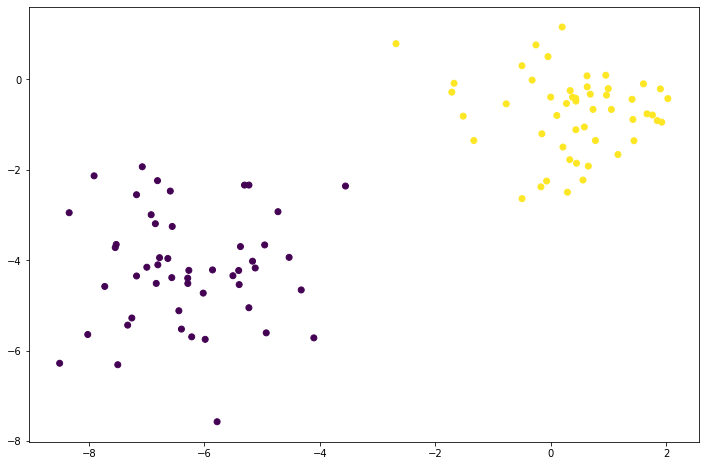

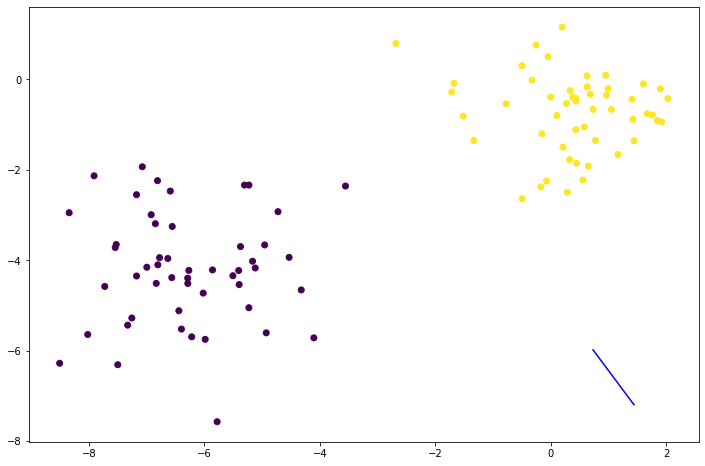

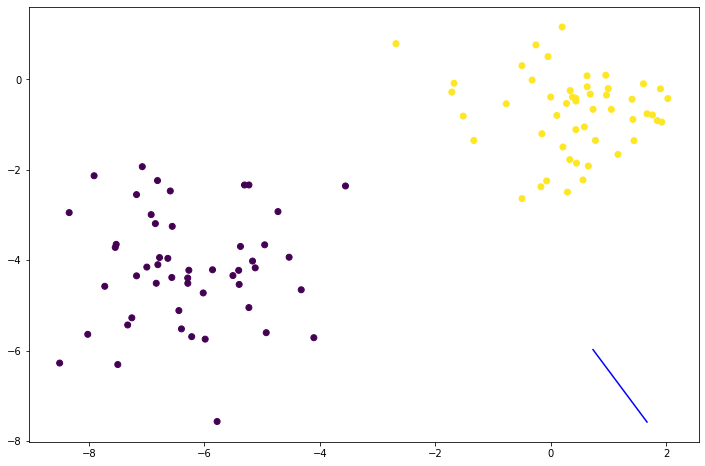

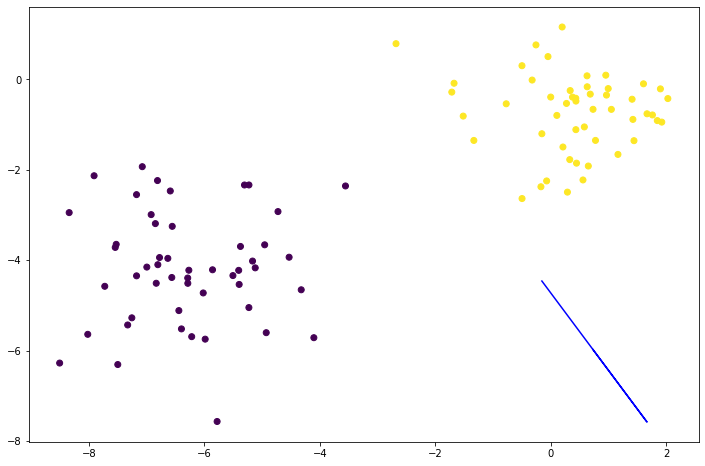

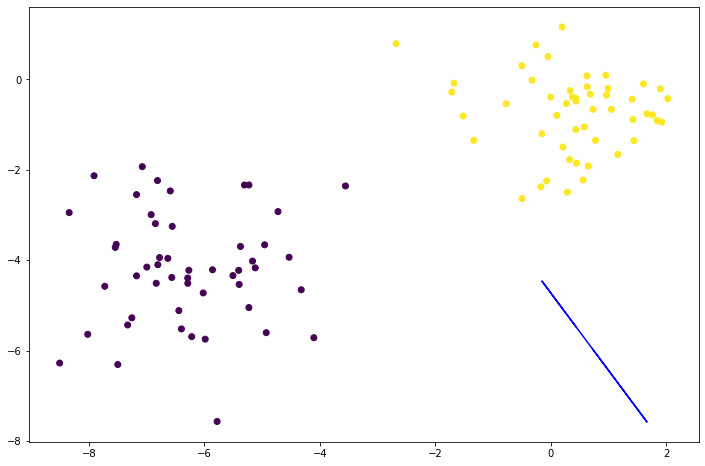

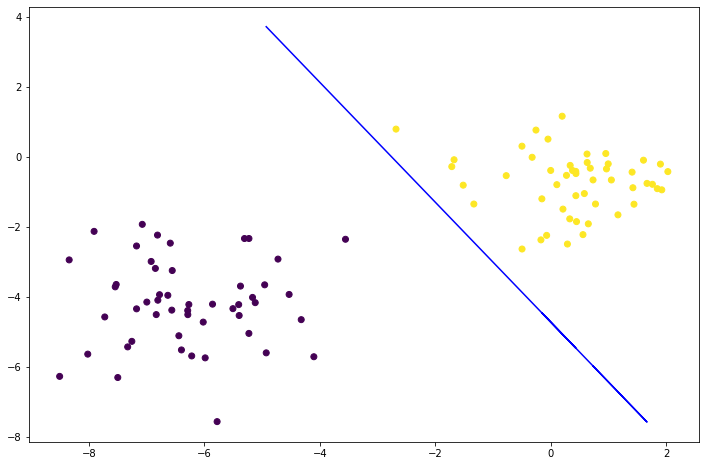

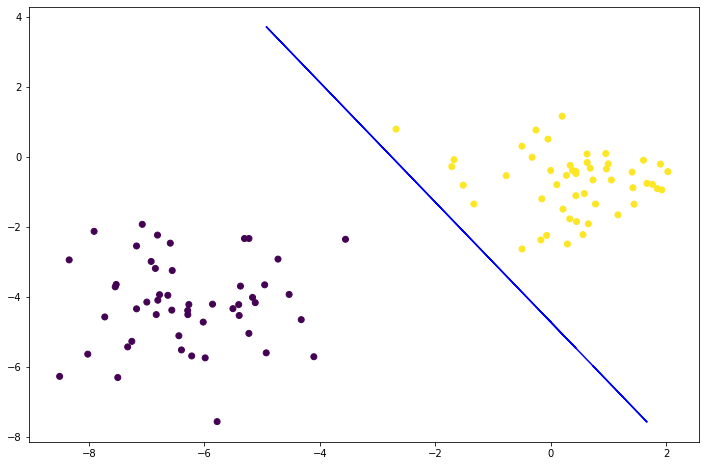

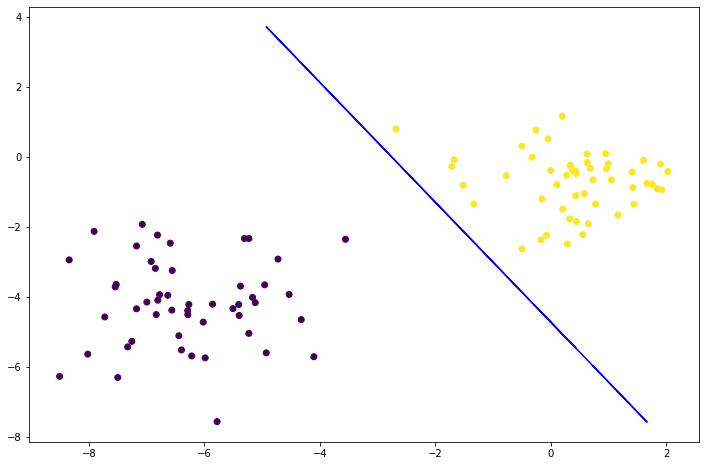

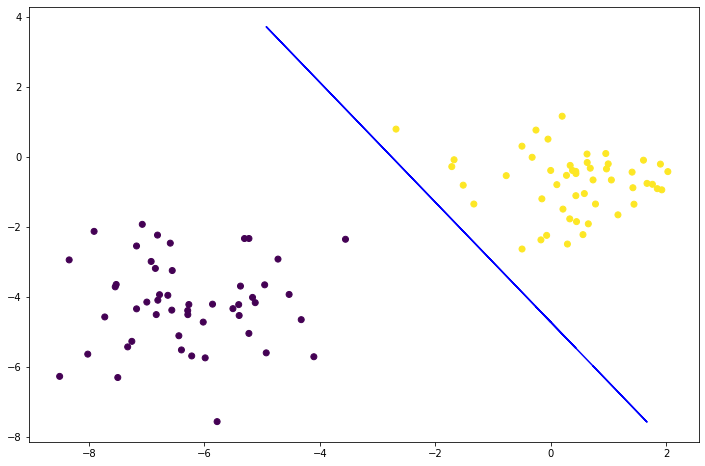

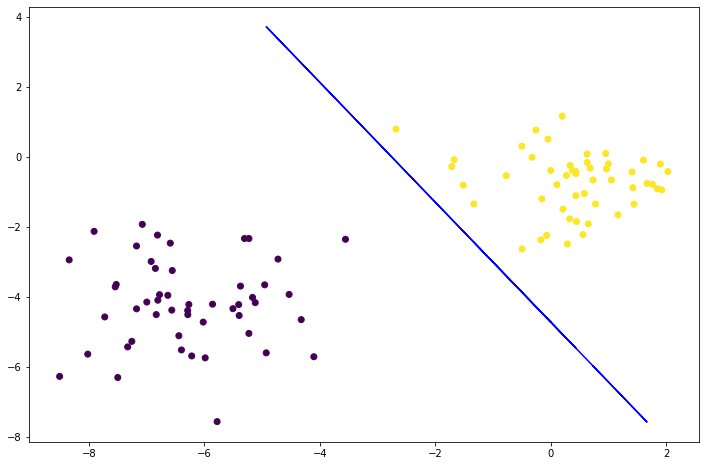

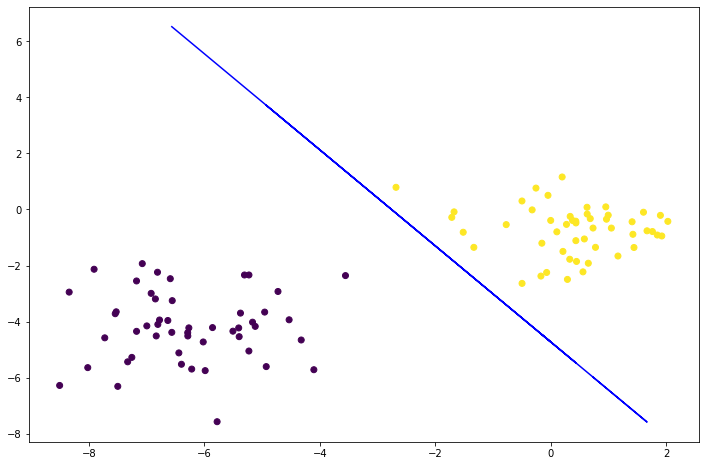

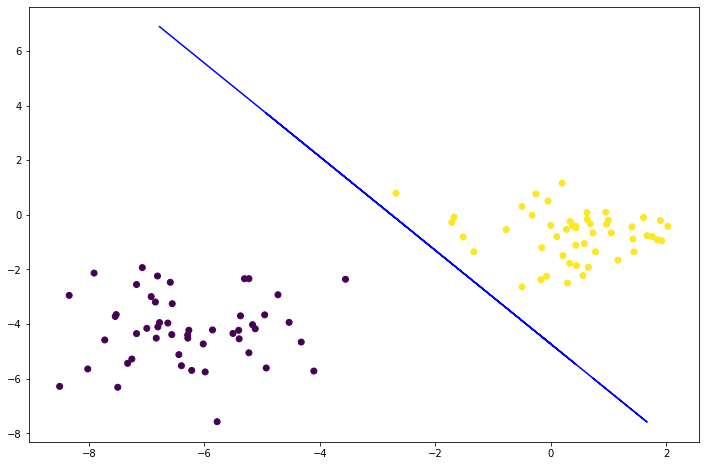

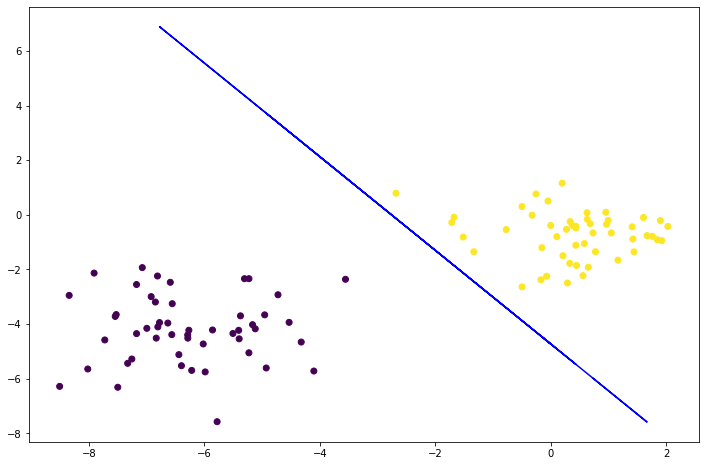

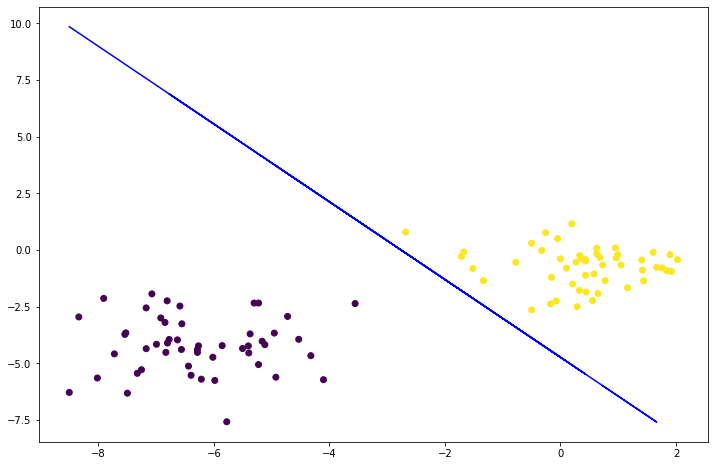

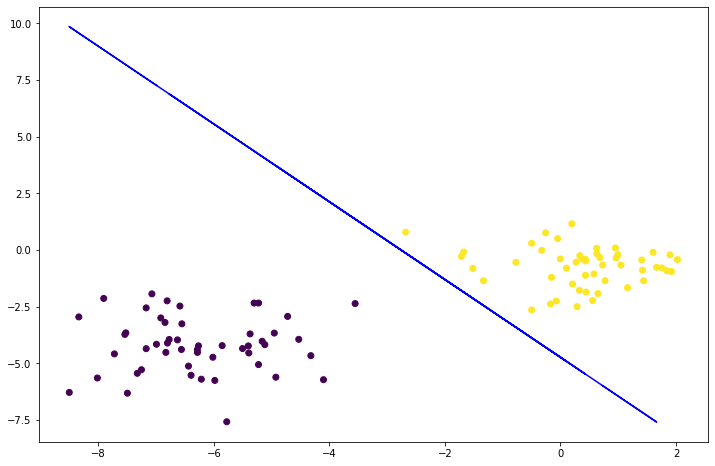

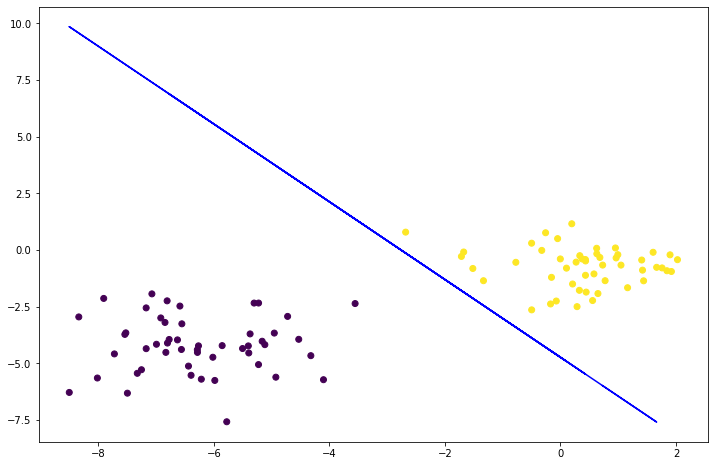

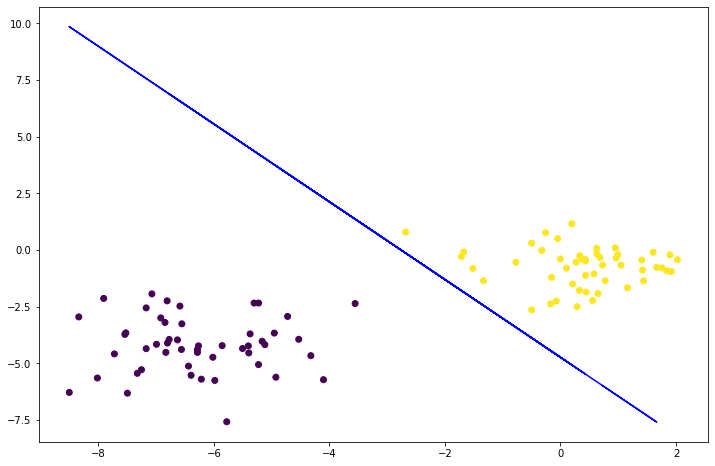

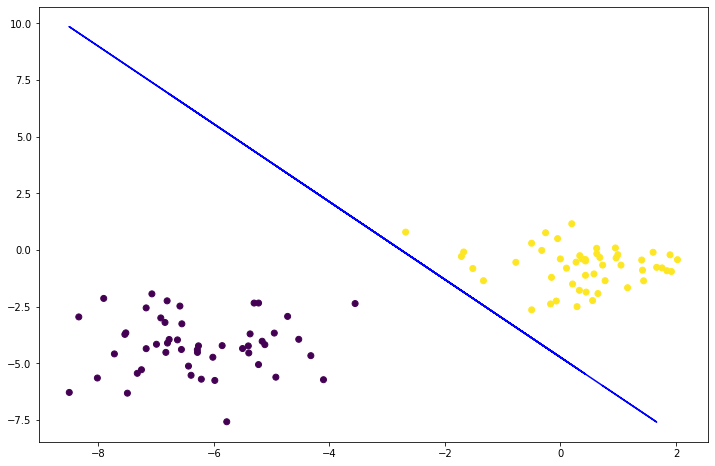

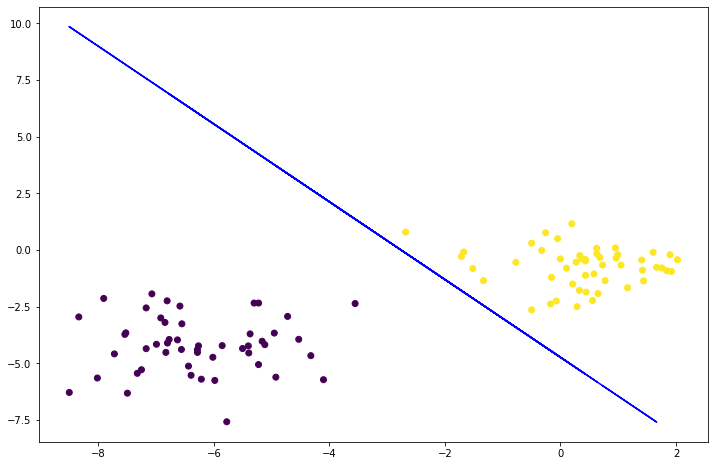

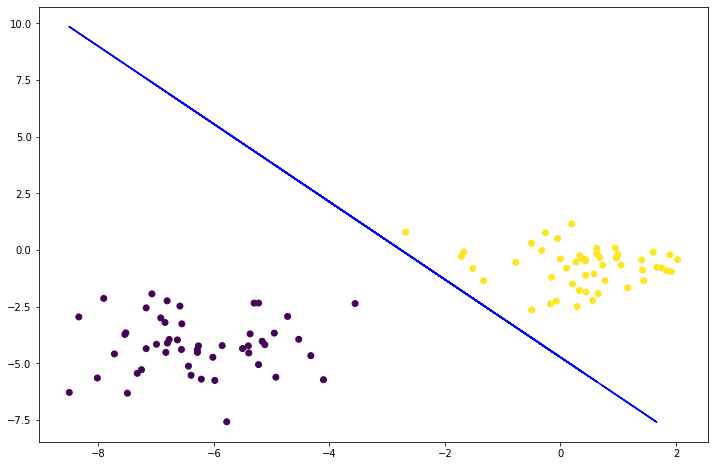

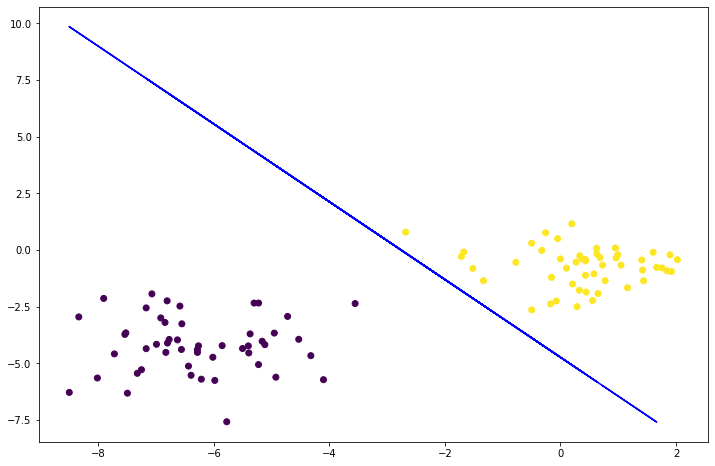

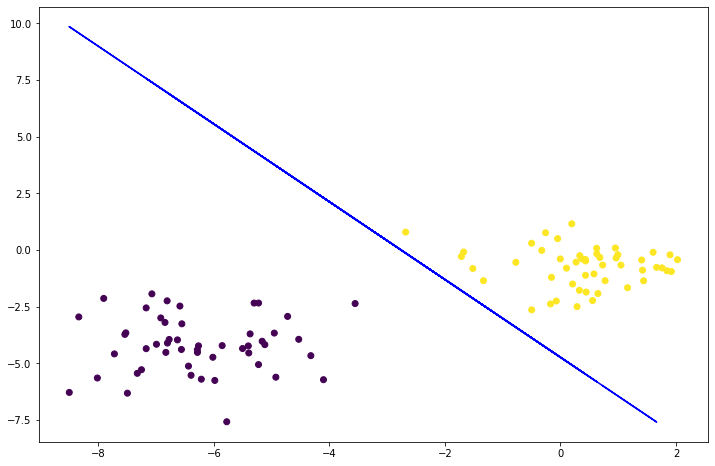

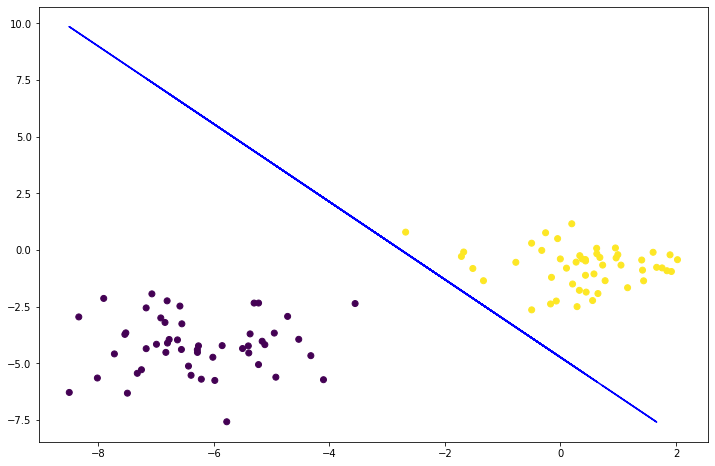

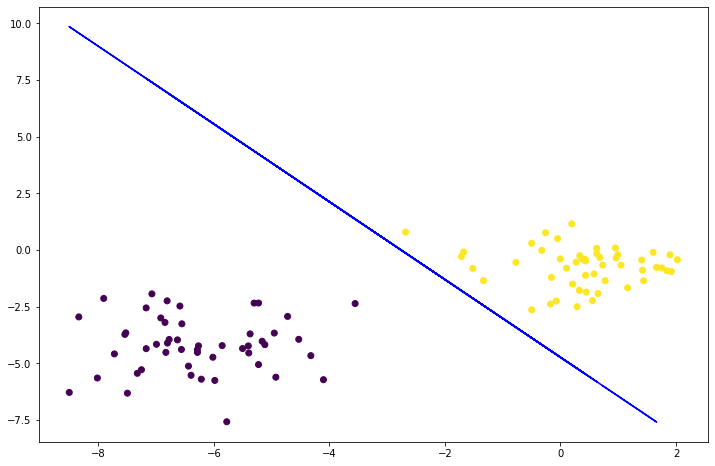

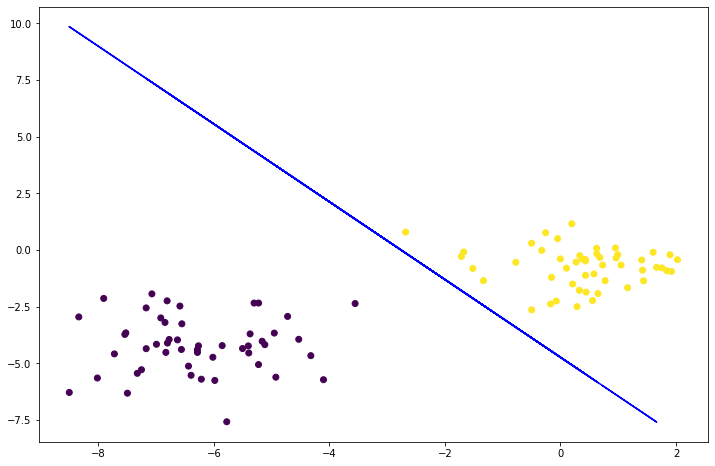

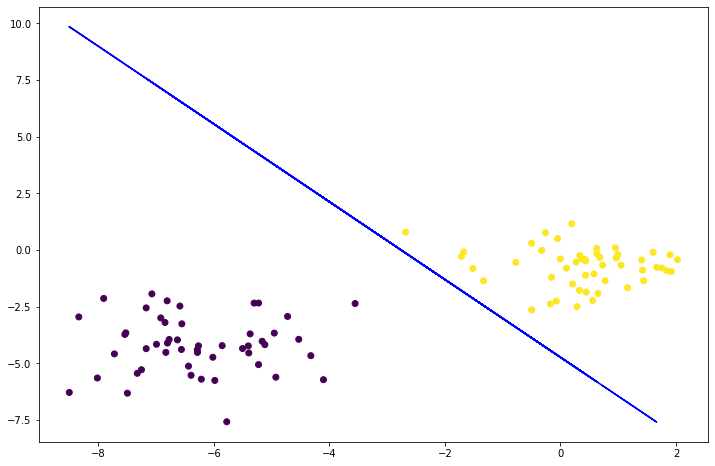

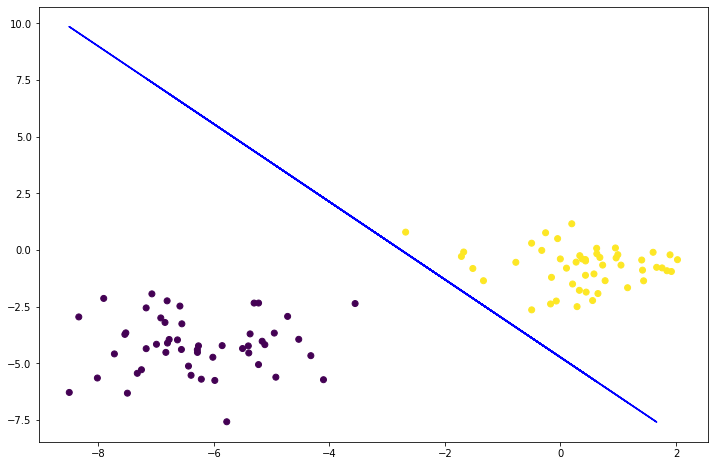

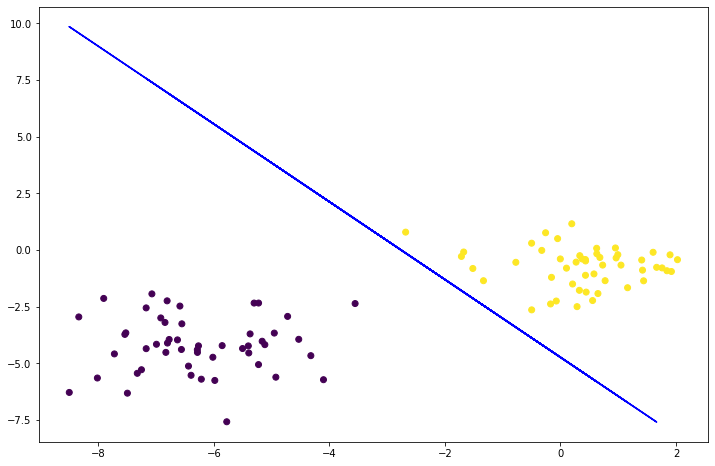

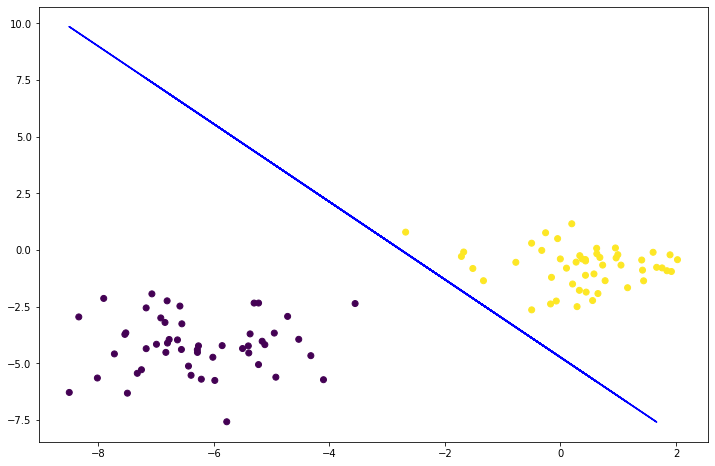

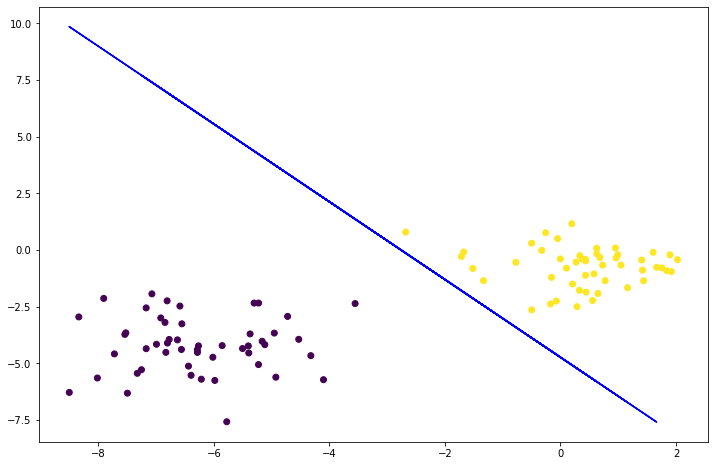

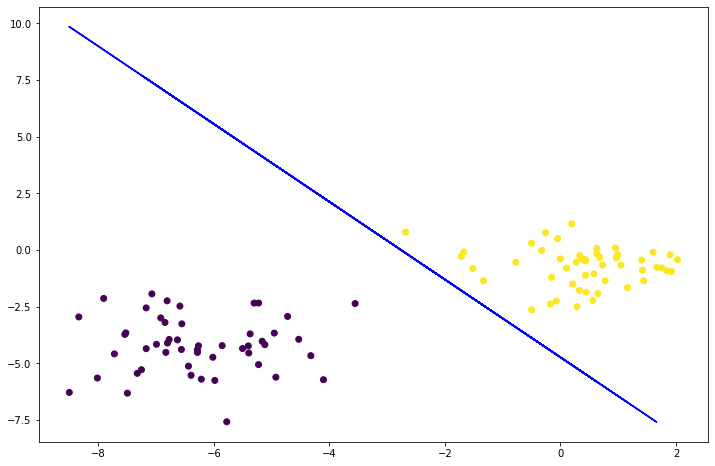

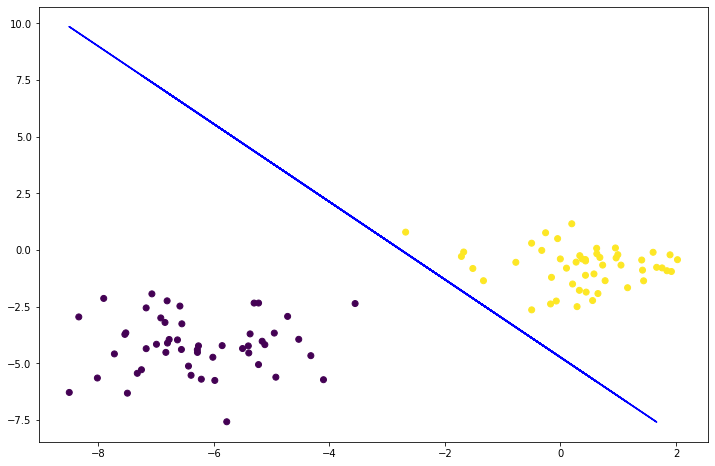

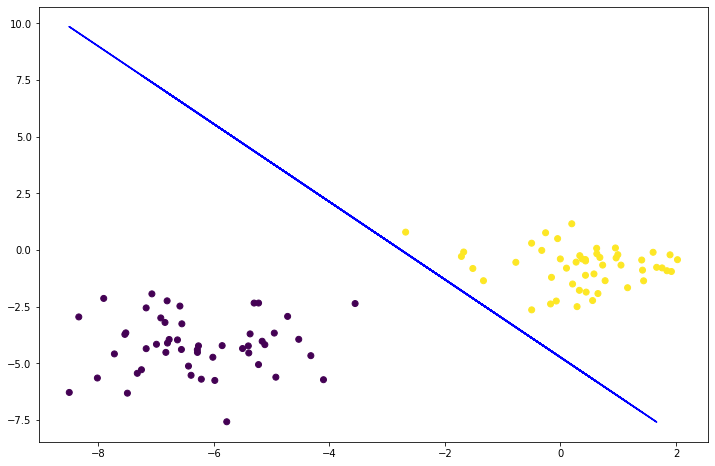

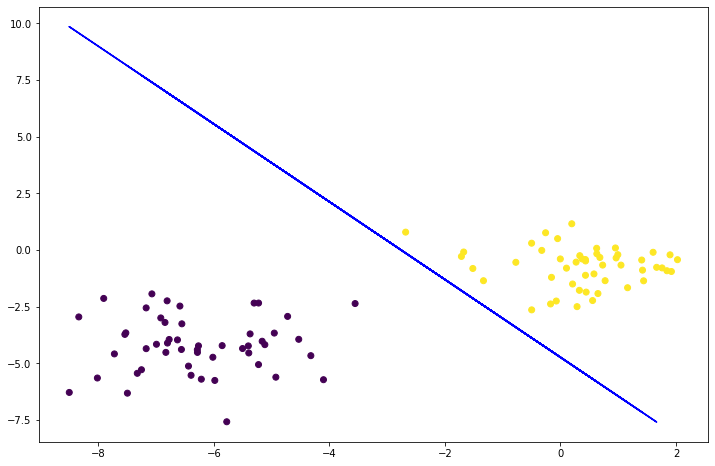

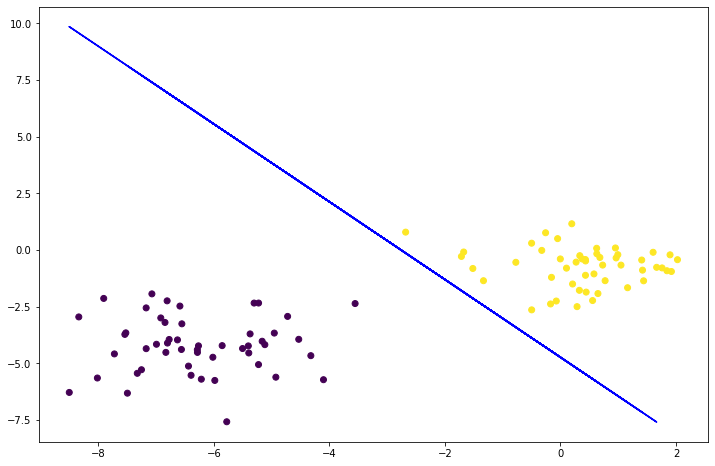

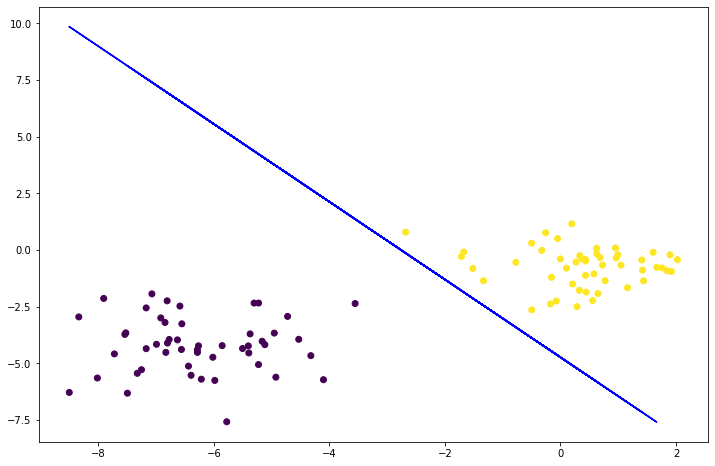

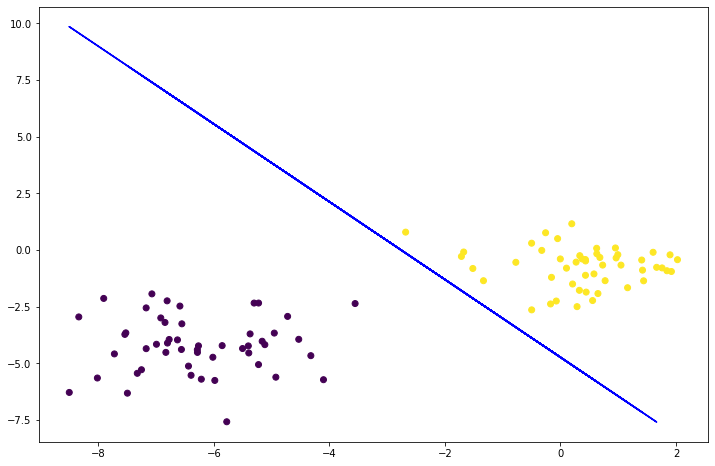

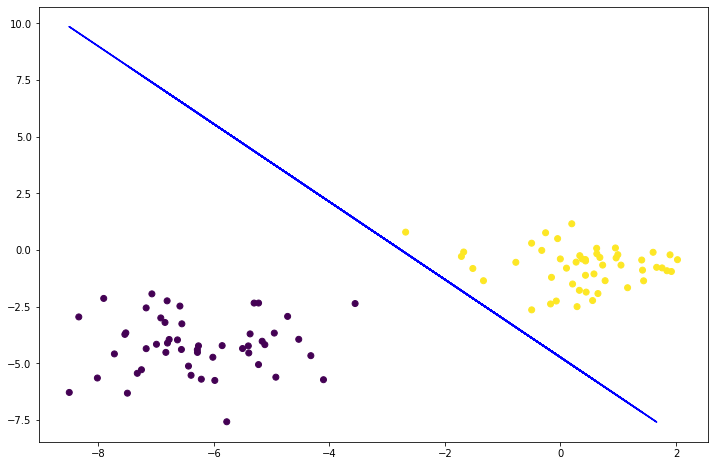

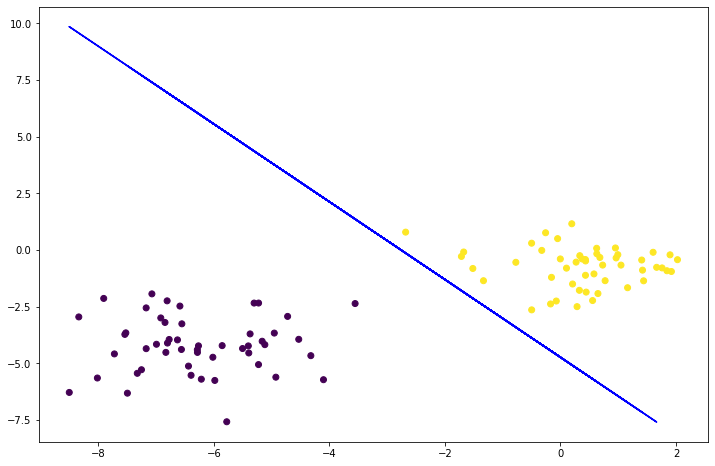

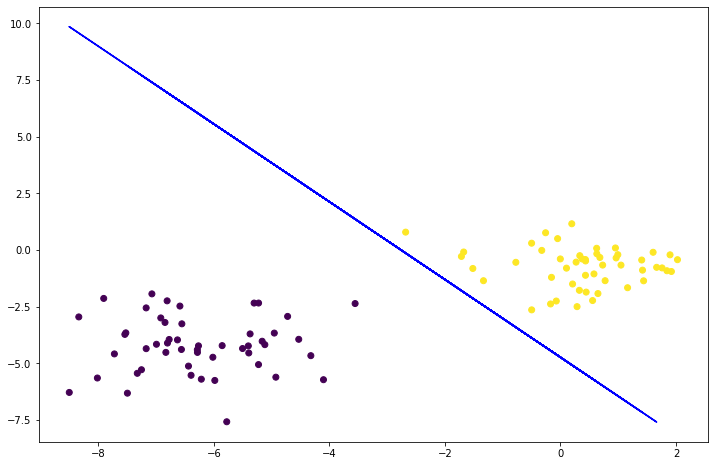

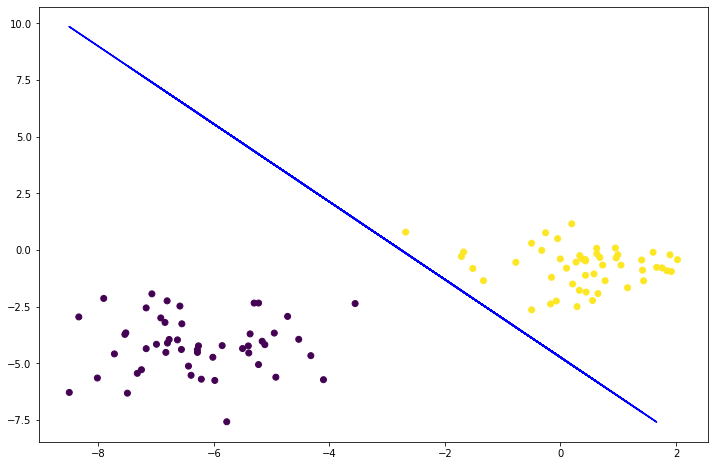

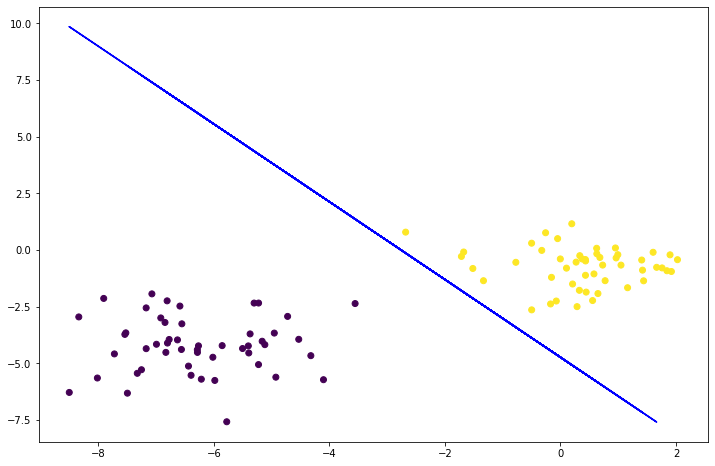

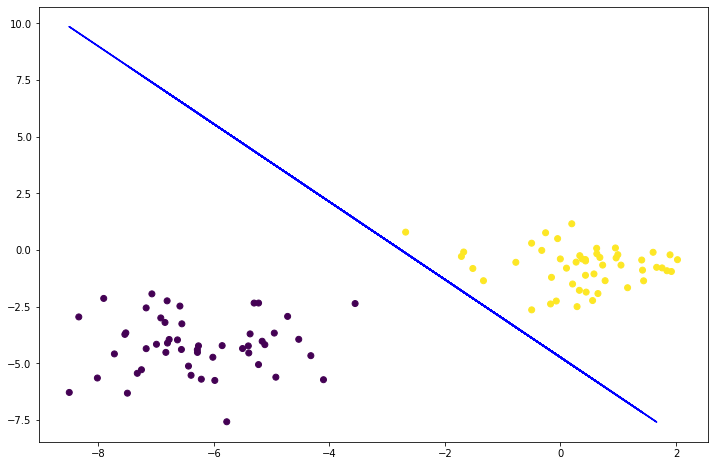

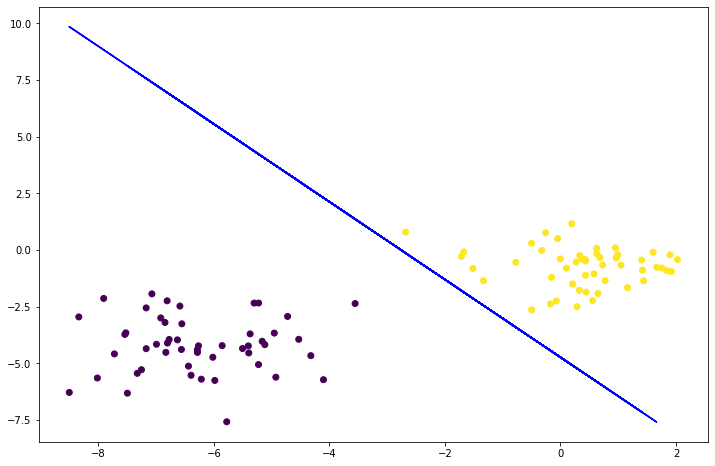

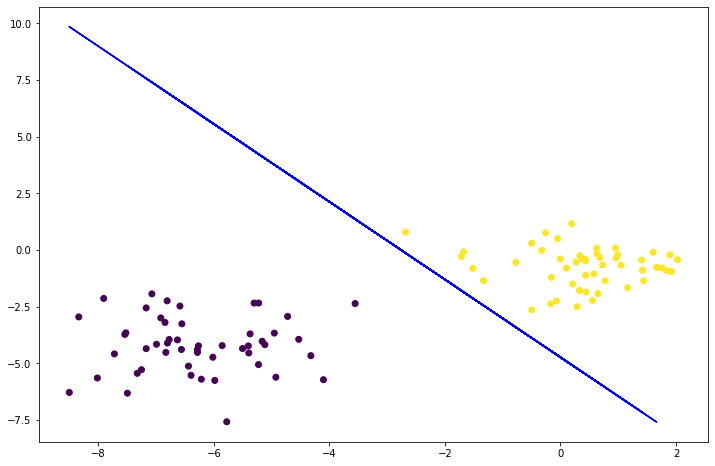

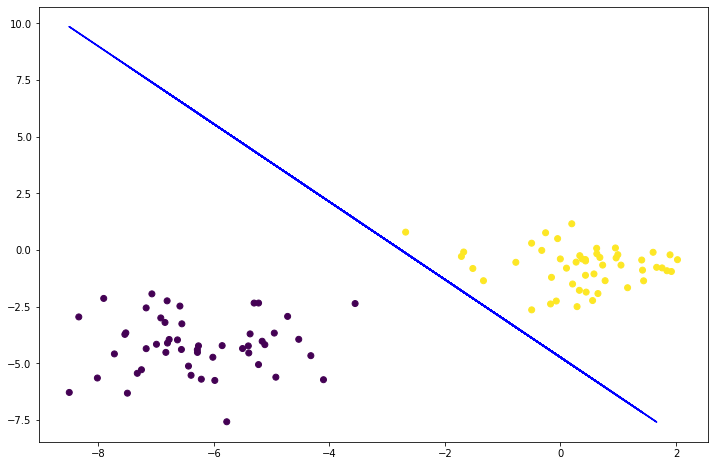

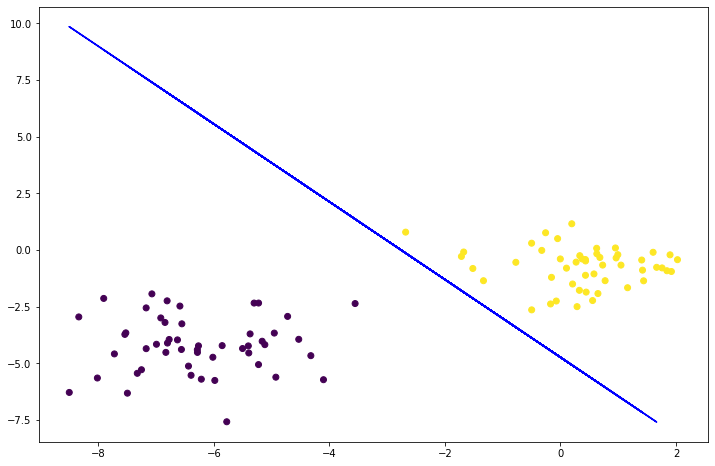

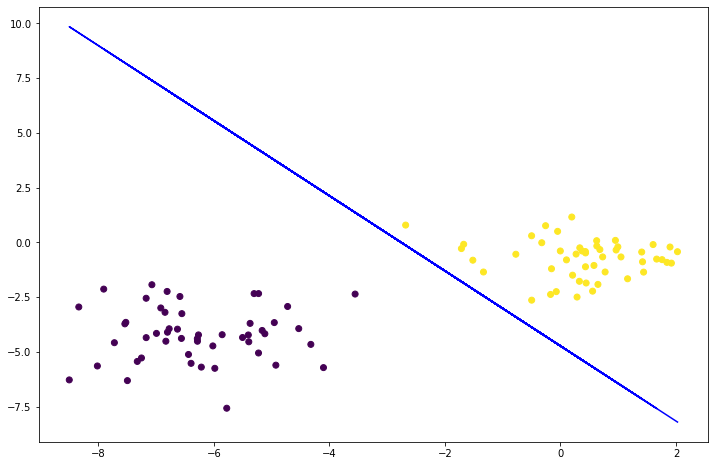

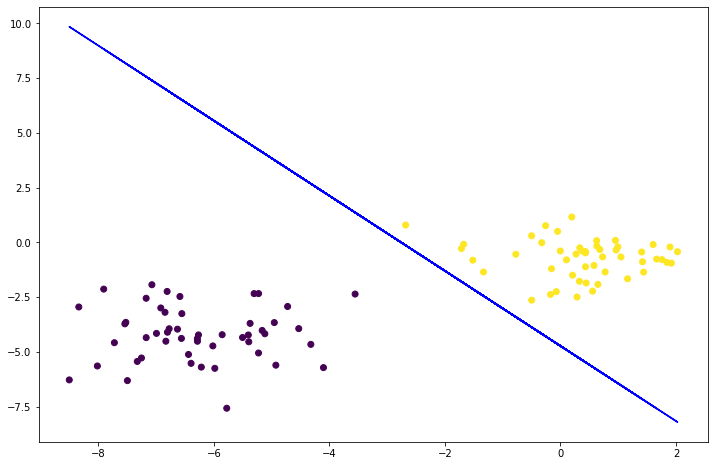

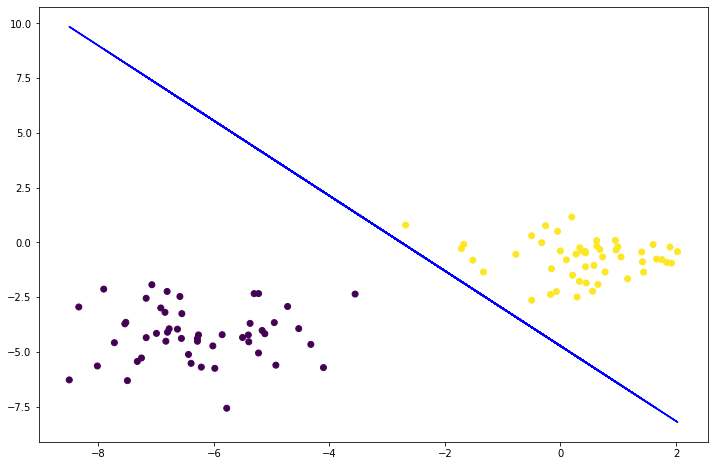

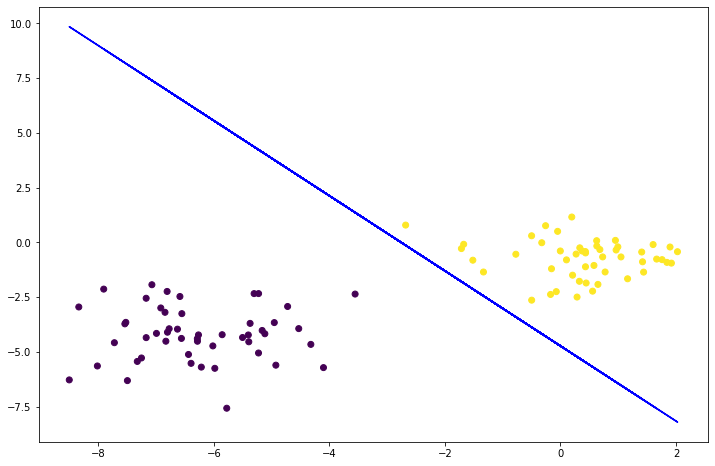

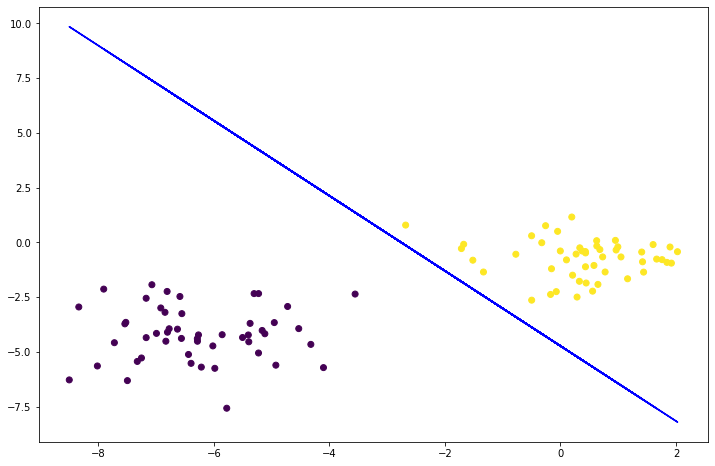

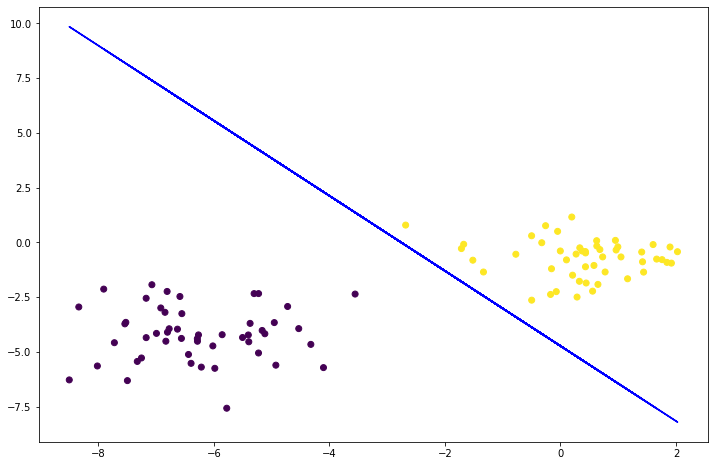

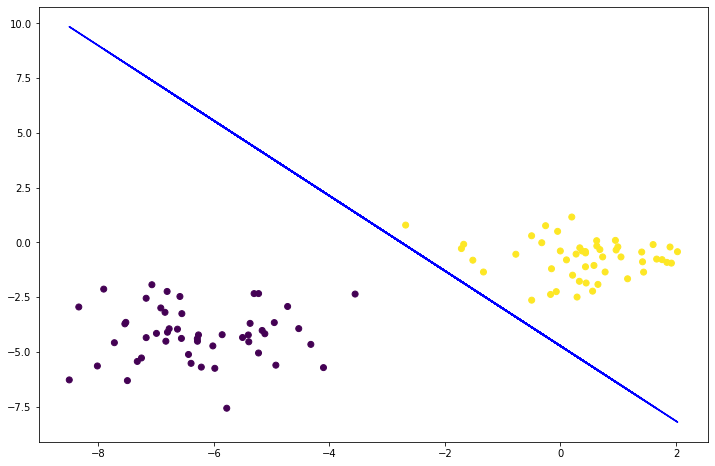

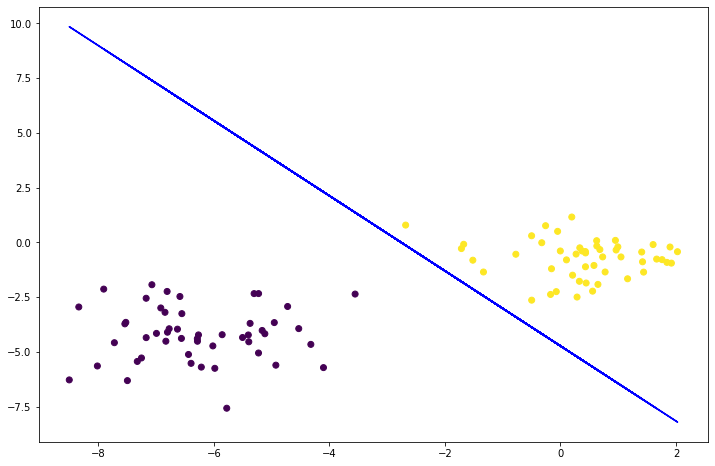

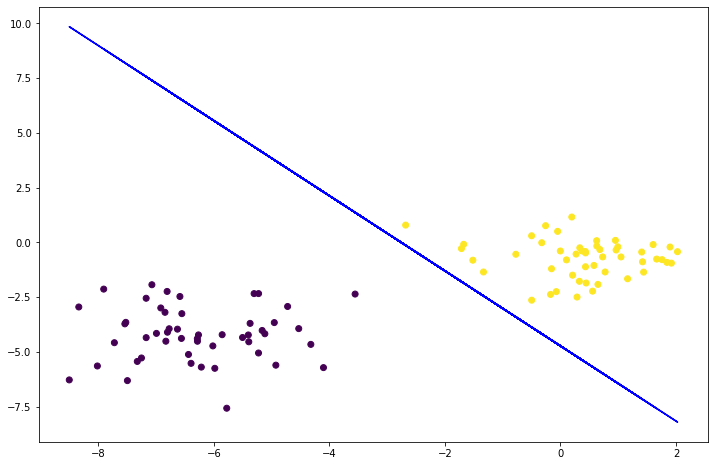

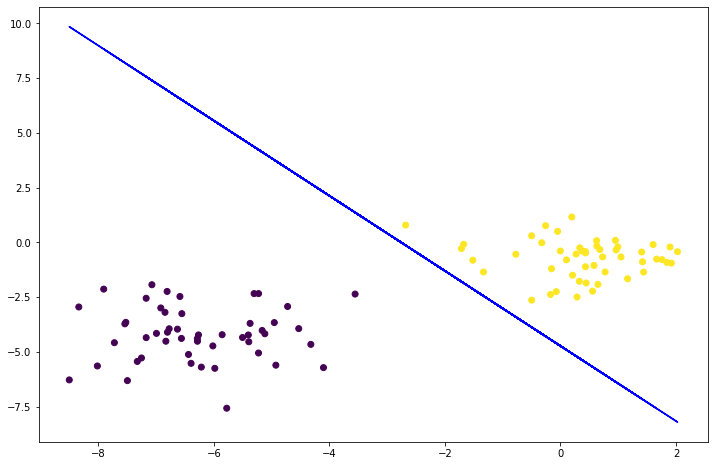

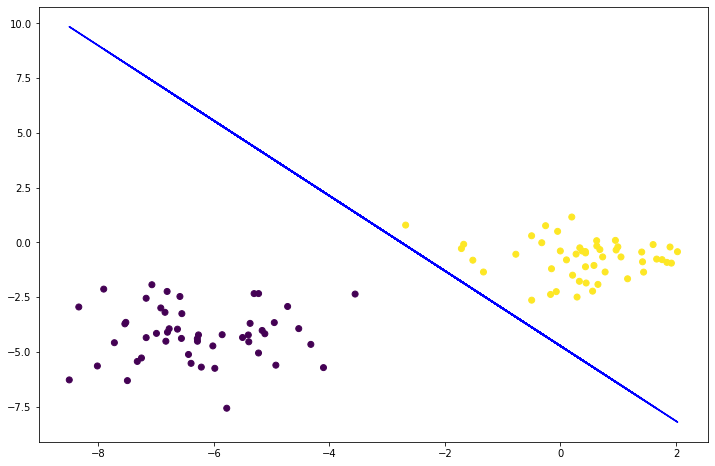

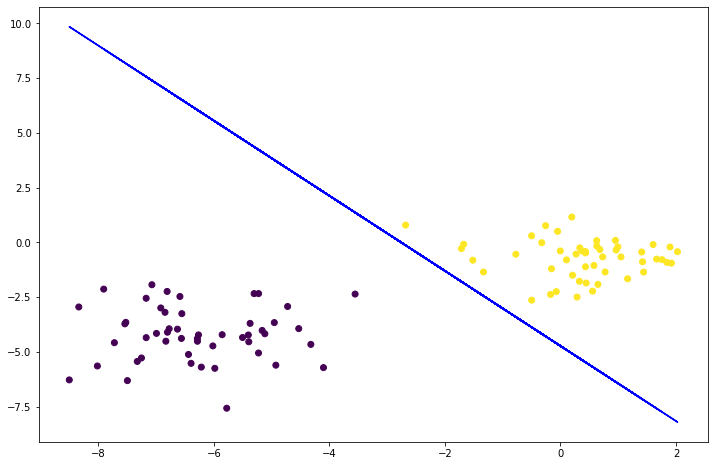

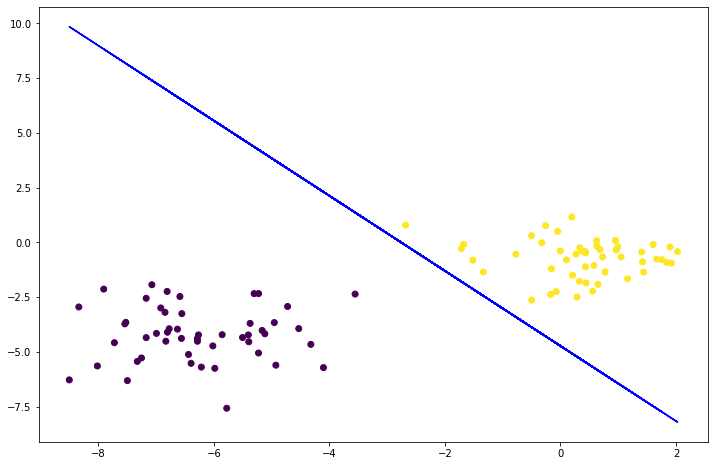

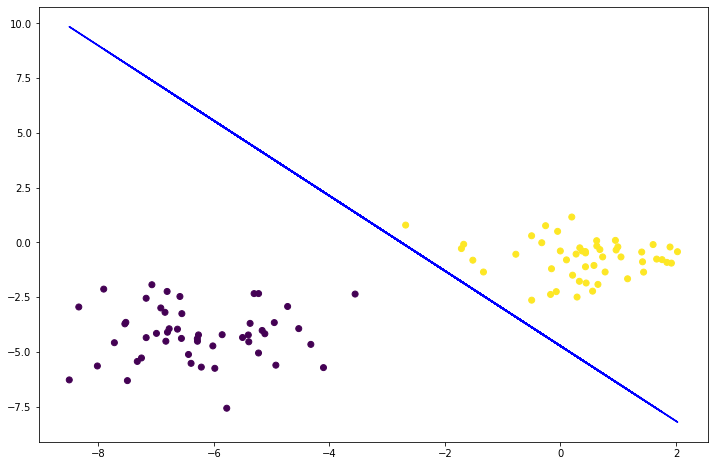

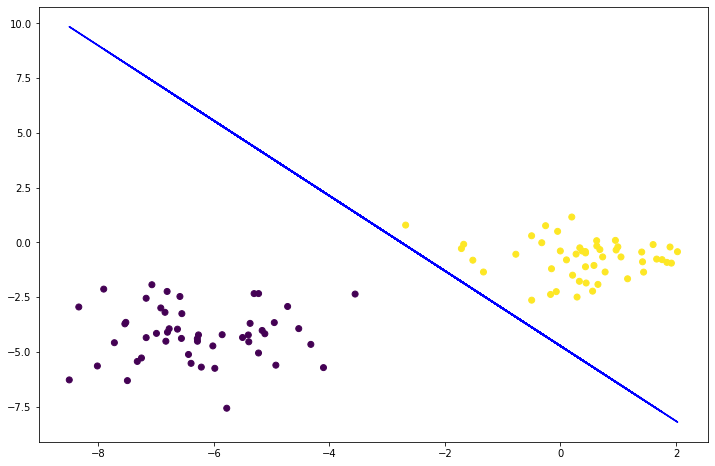

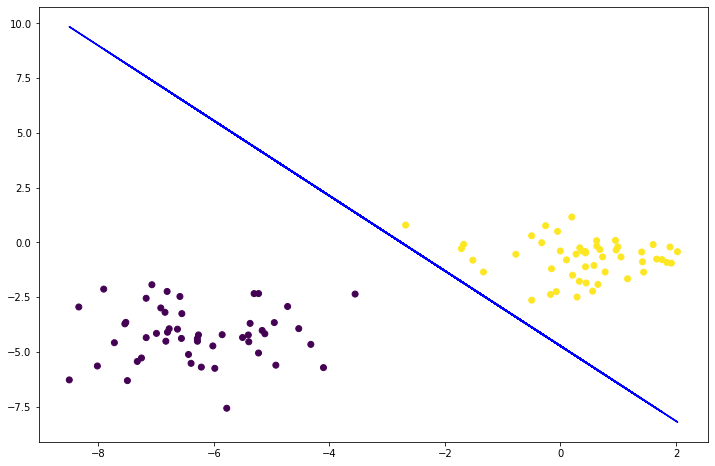

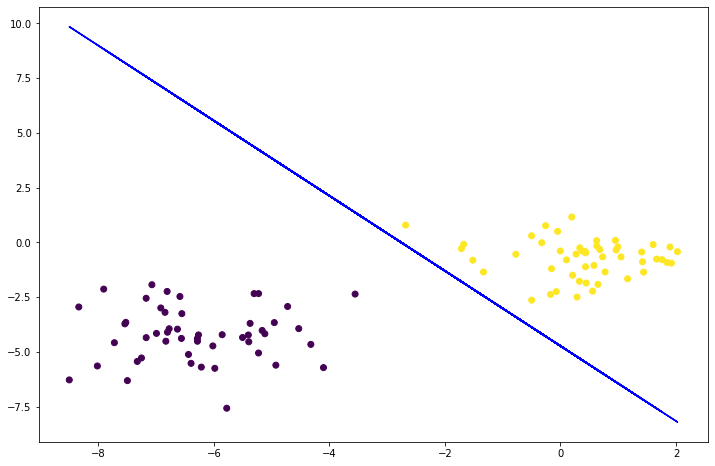

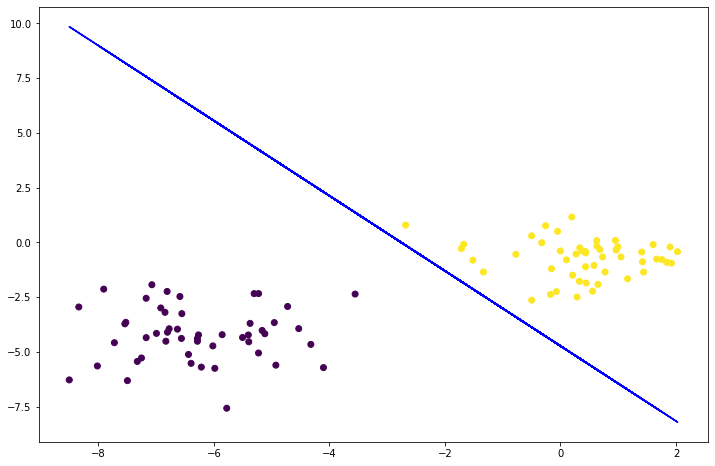

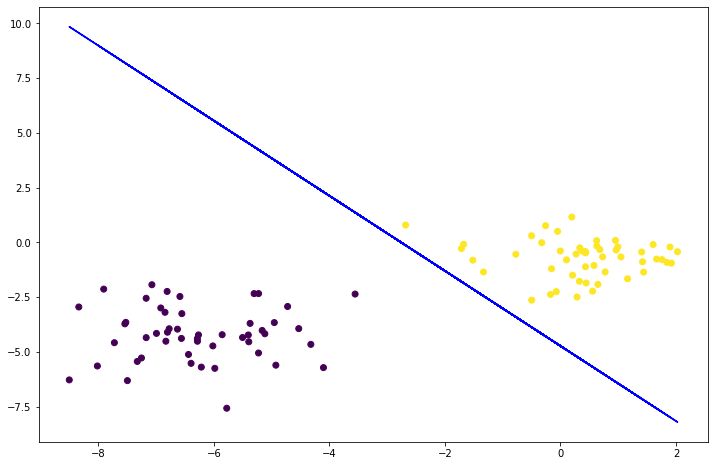

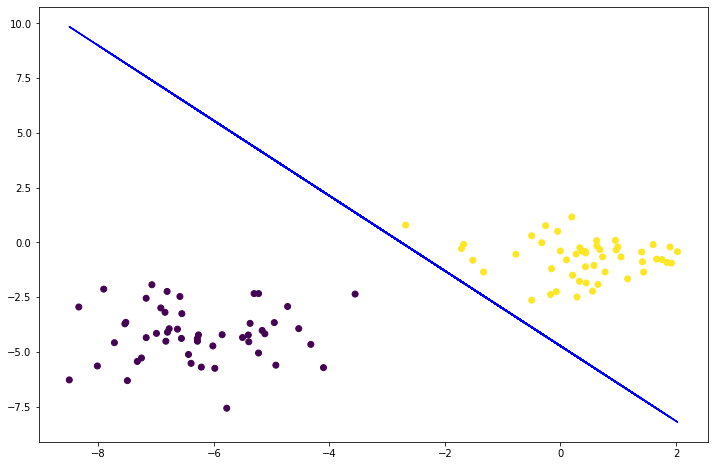

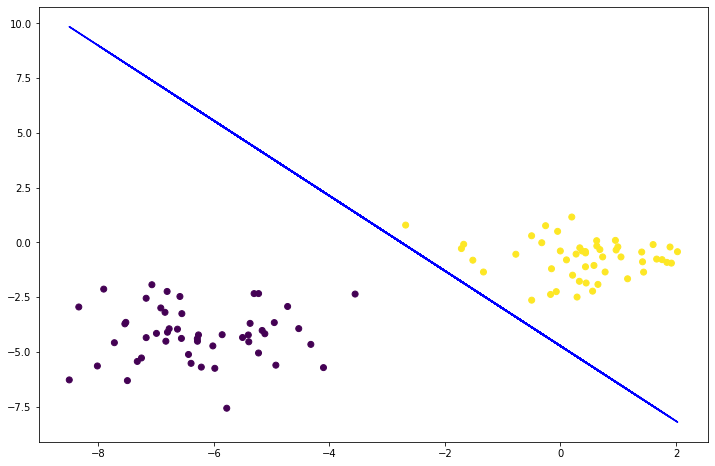

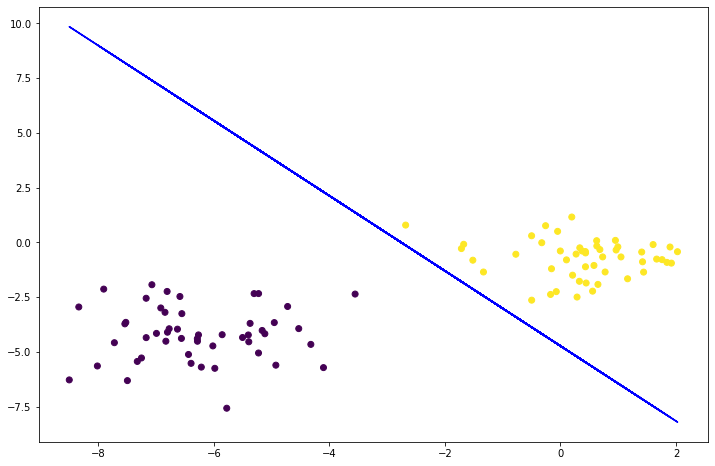

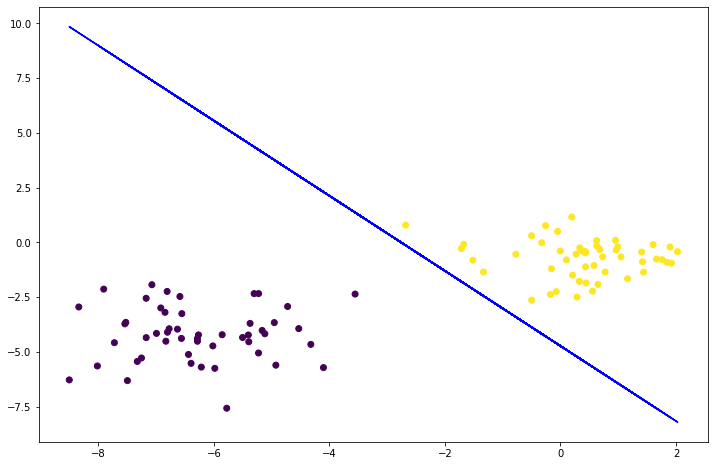

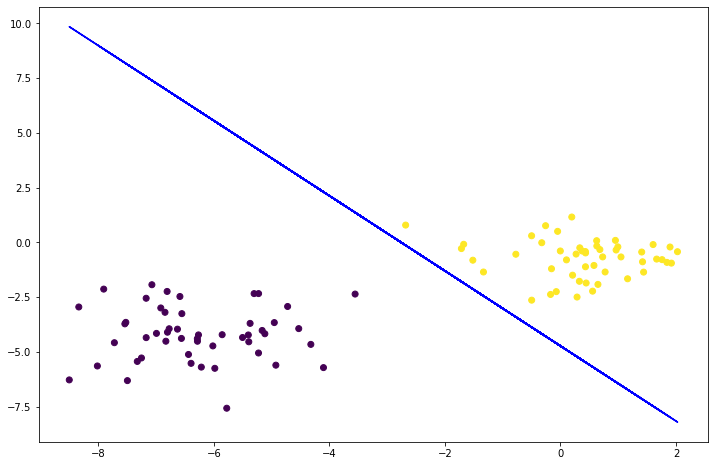

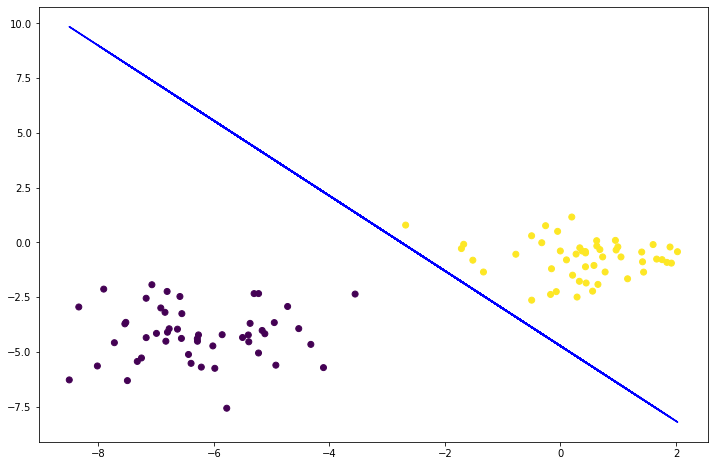

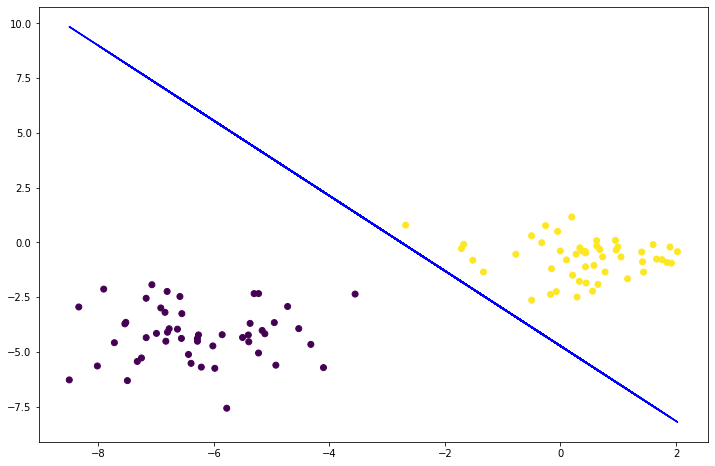

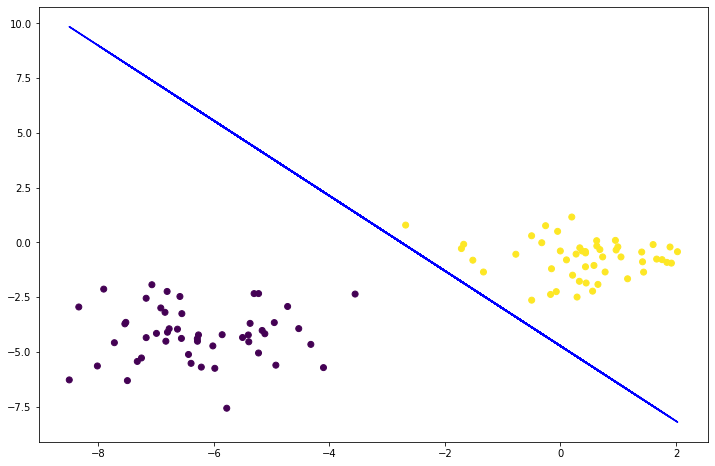

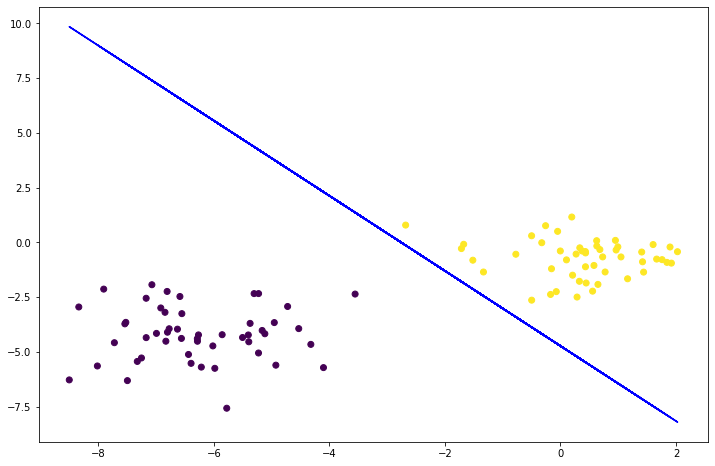

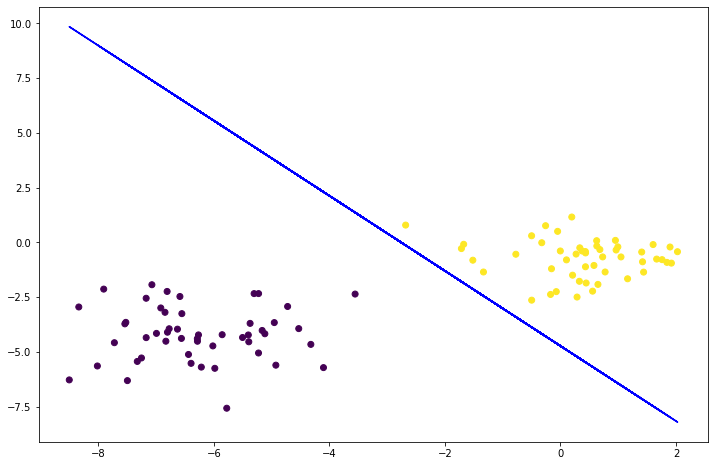

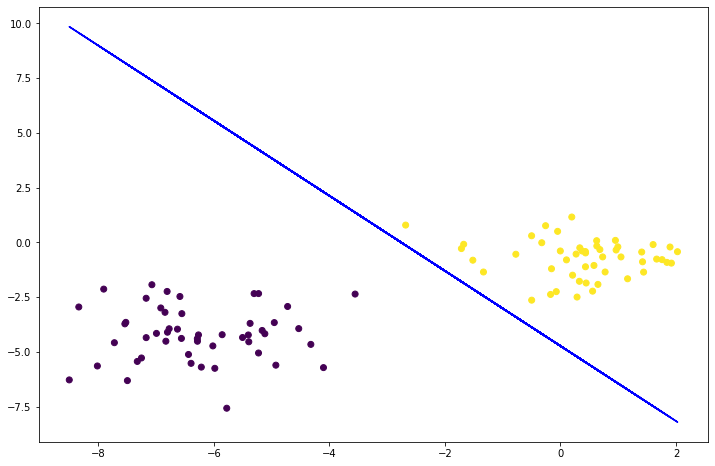

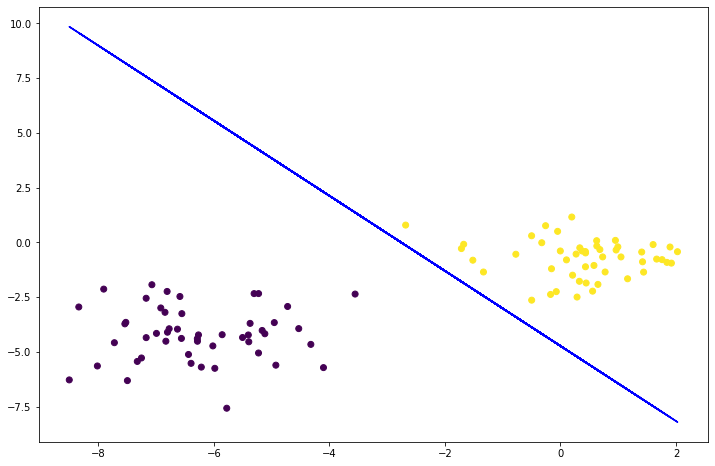

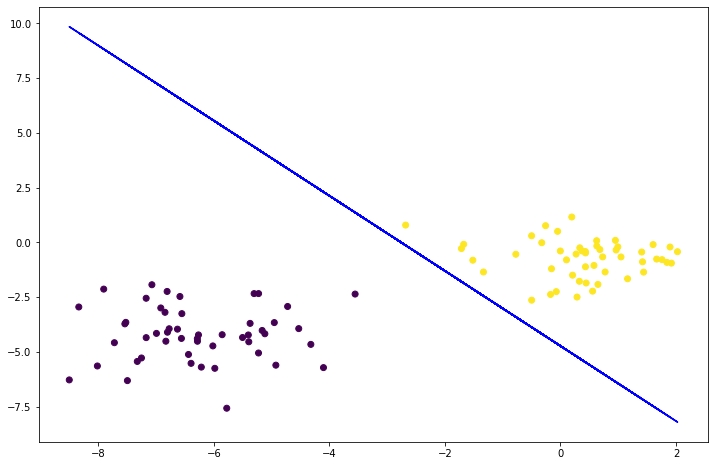

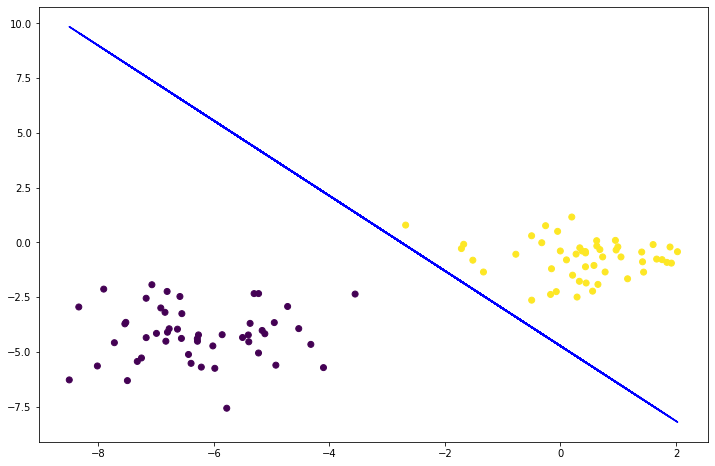

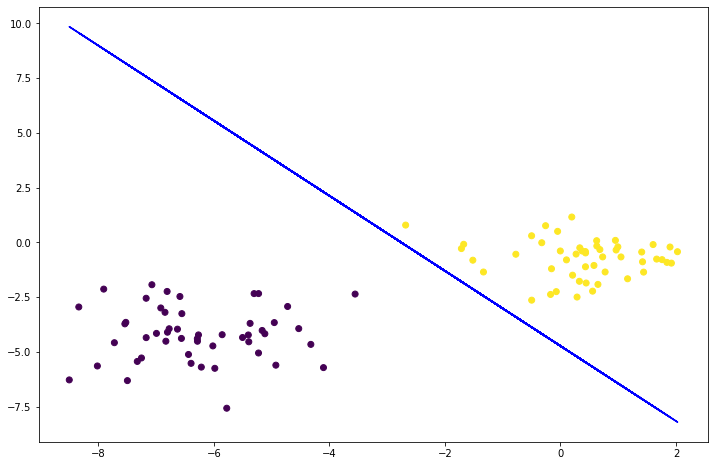

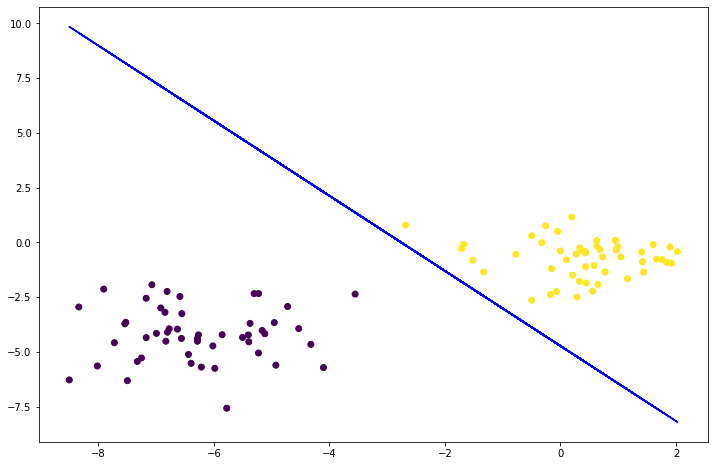

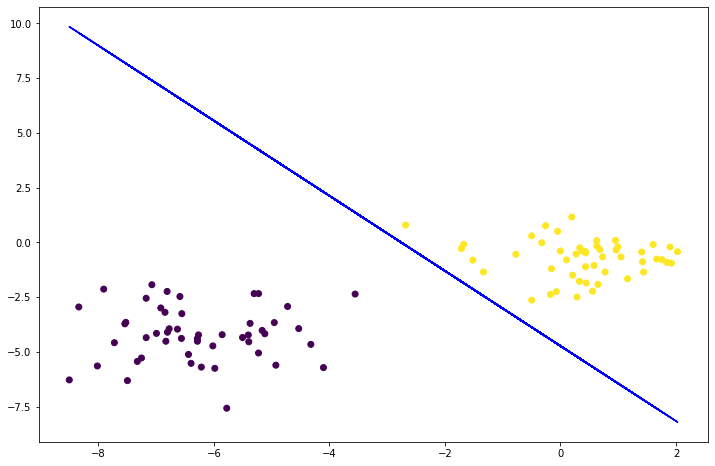

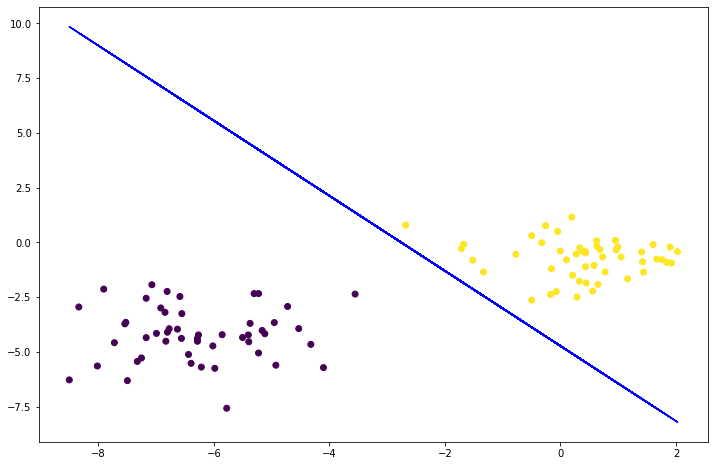

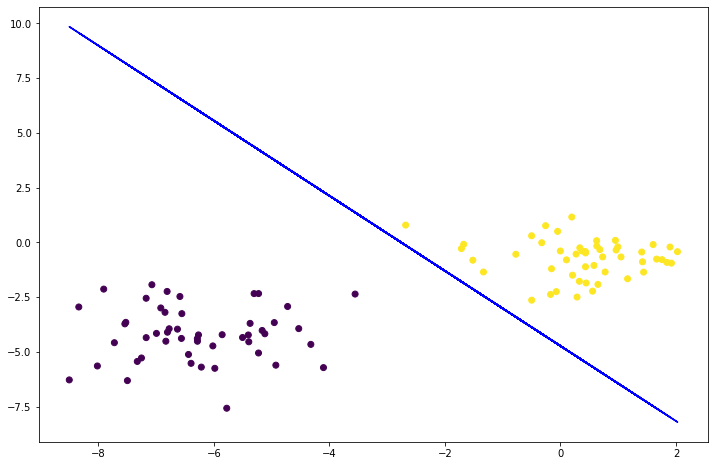

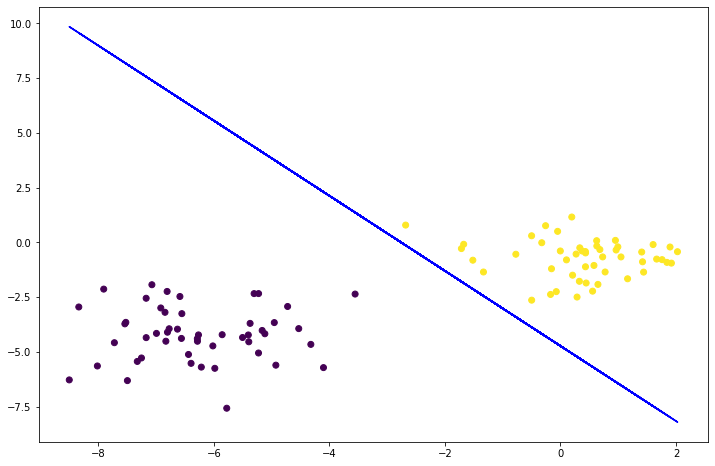

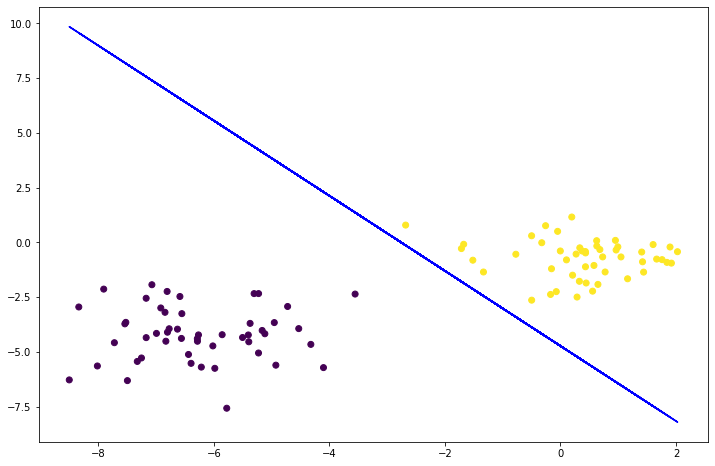

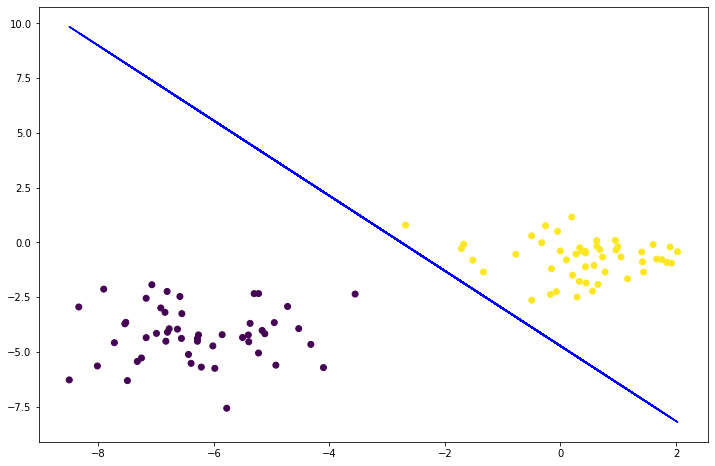

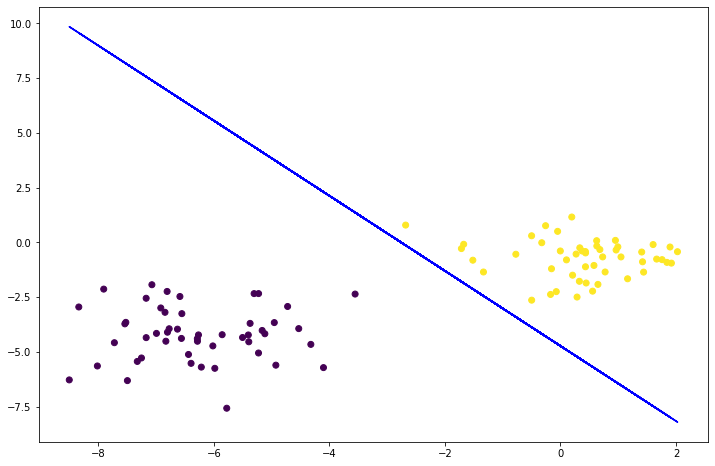

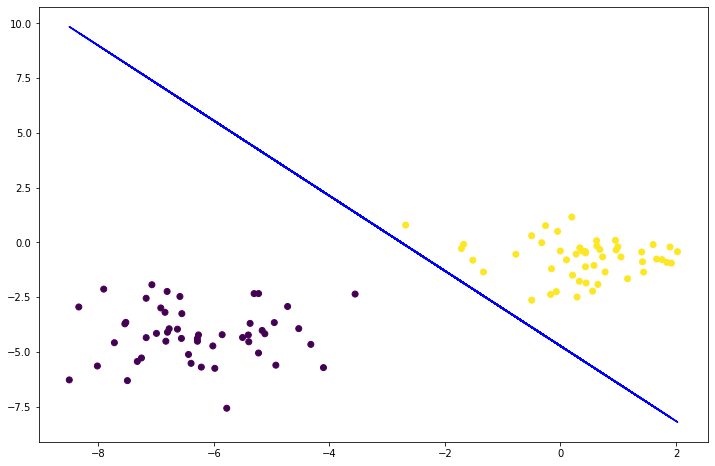

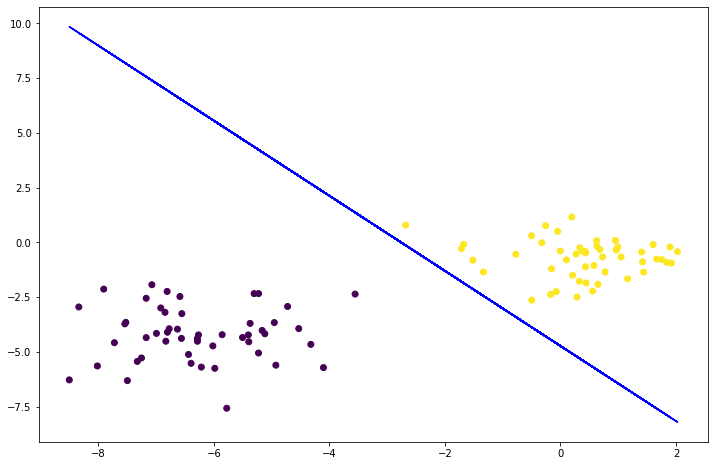

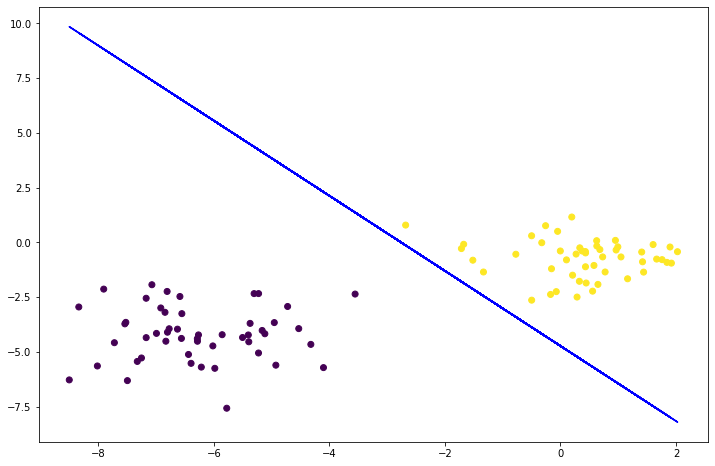

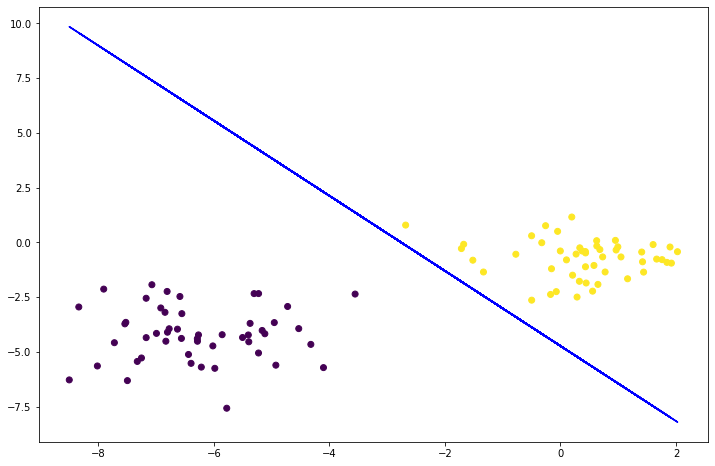

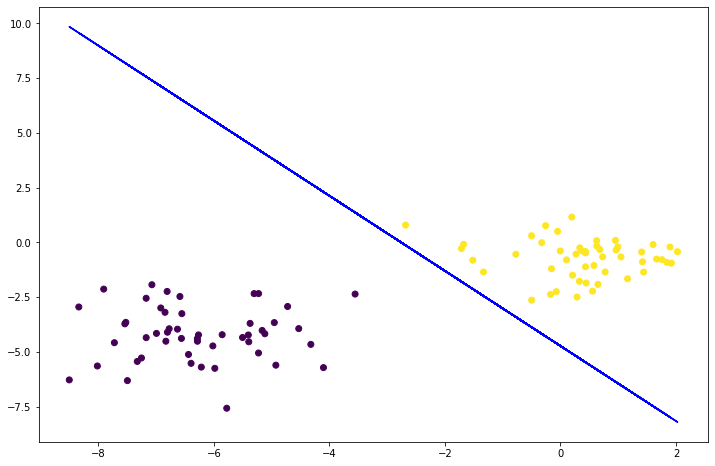

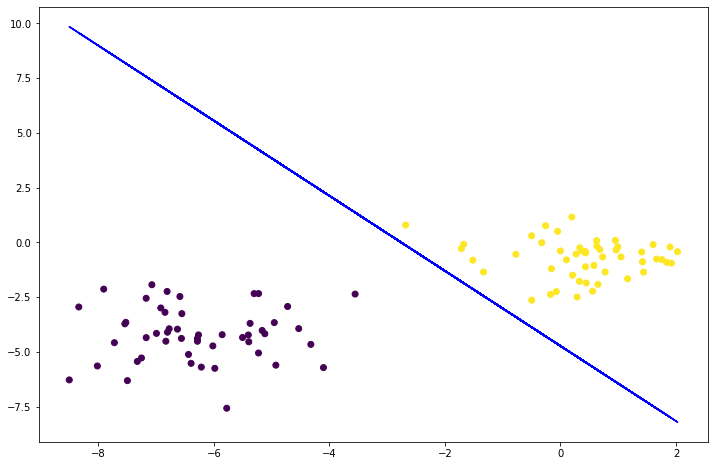

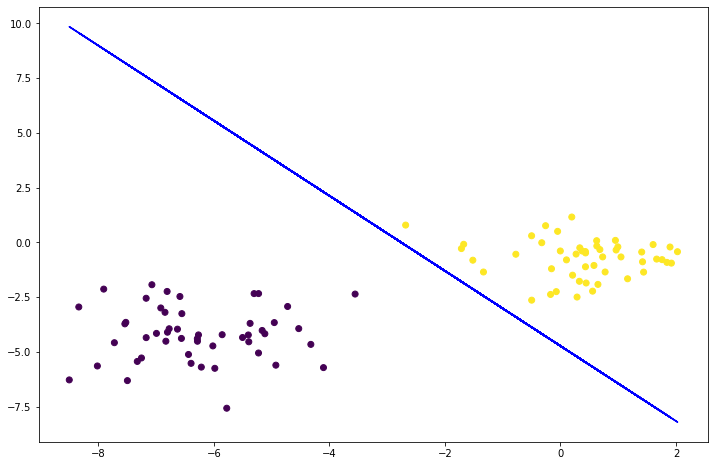

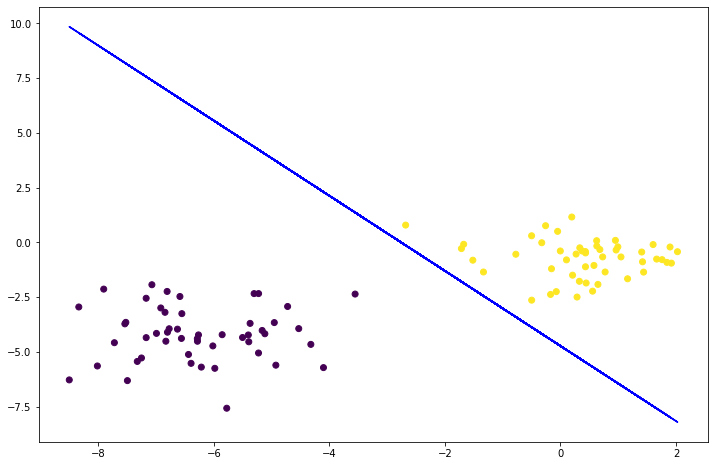

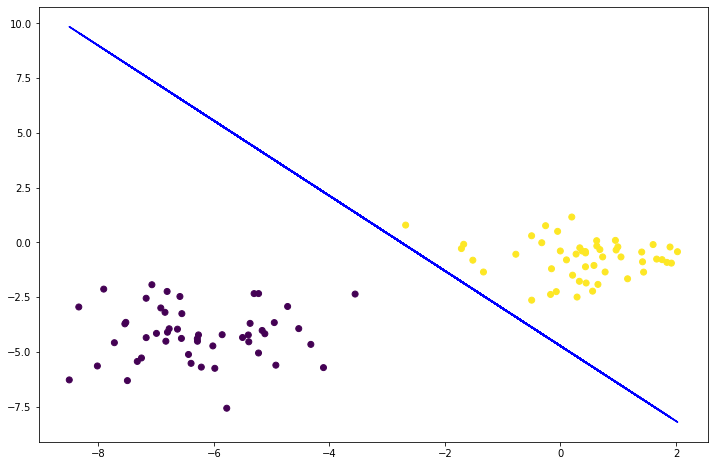

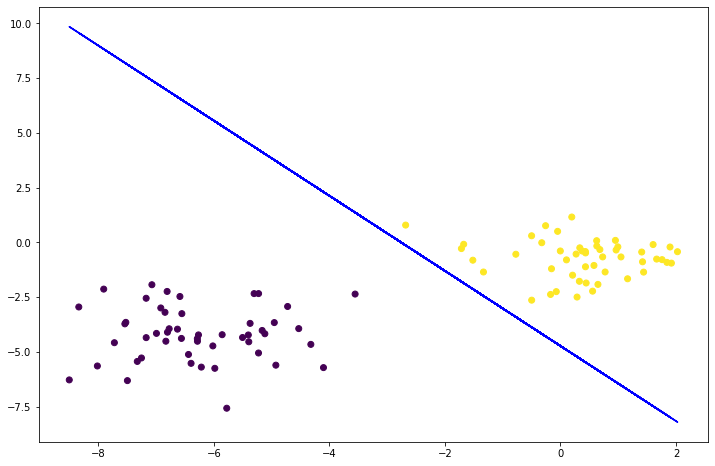

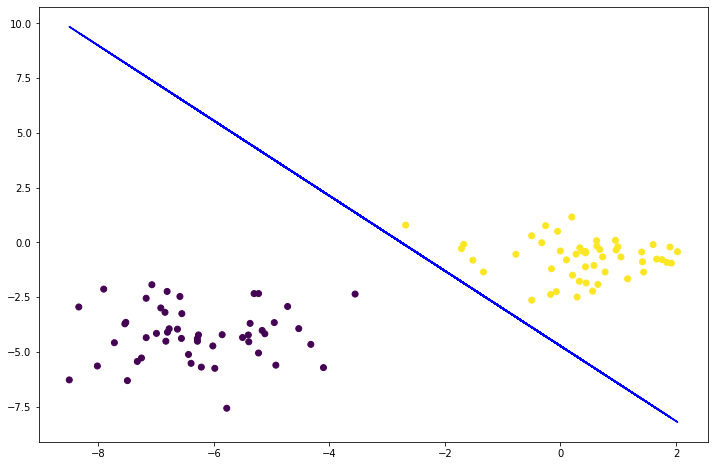

In [48]:
sortie,t,sortie_X,sortie_Y = adaline(X, y, 0.01, 10)

In [40]:
def sortie_perc(x, r, t):
    S = np.dot(x,t)
    erreur = r - S
    return erreur

In [41]:
def grad_perc(erreur):
    if erreur > 0:
        approximation = 1
    else:
        approximation = -1
    return approximation

In [28]:
def adapt_perc(epsi, r, t, x, biais, error):
    if r != grad_perc(error):
        t = t + epsi*grad_perc(error)*x
        biais = biais + epsi*grad_perc(error)
    else:
        t = t
        biais = biais
    return t, biais

In [29]:
def perceptron(X, y, epsi, N):   
    sortie_X = []
    sortie_Y = []
    sortie = [0]*len(X)   
    biais = 1
    t = np.array([0.3,0.8,0.4])    
    for i in range(N):
        erreur_total = 0
        for j in range(X.shape[0]):
            XN = X[j]
            XN = np.insert(XN,0,biais)
            dN = y[j]            
            erreur = sortie_perc(XN, dN, t)
            a = grad_perc(erreur)
            erreur_total += erreur
            sortie[j] = a            
            t, biais = adapt_perc(epsi, dN, t, XN, biais, erreur)            
    for j in X[:,0]:
        sortie_X.append(j)
        sortie_Y.append(-(t[1]/t[2]) * j - (t[0]/[2]))       
        plt.figure(figsize=(12,8))
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.plot(sortie_X, sortie_Y, c='r')
        plt.show()   
    return sortie, t, sortie_X, sortie_Y

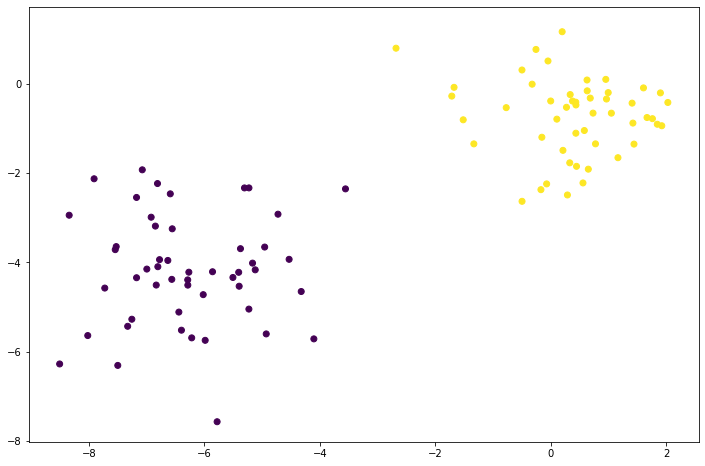

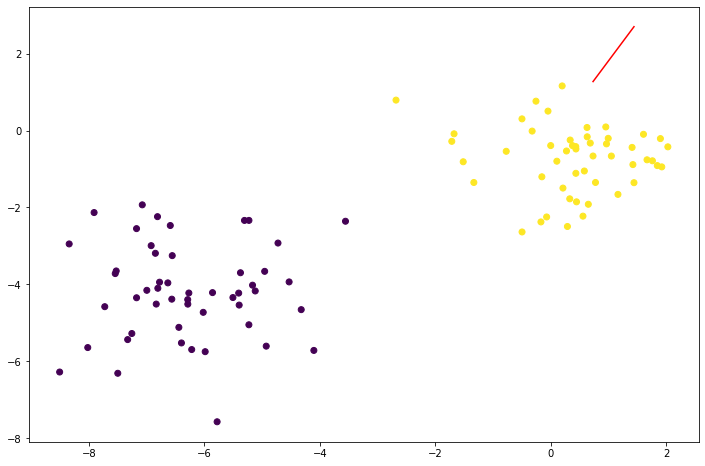

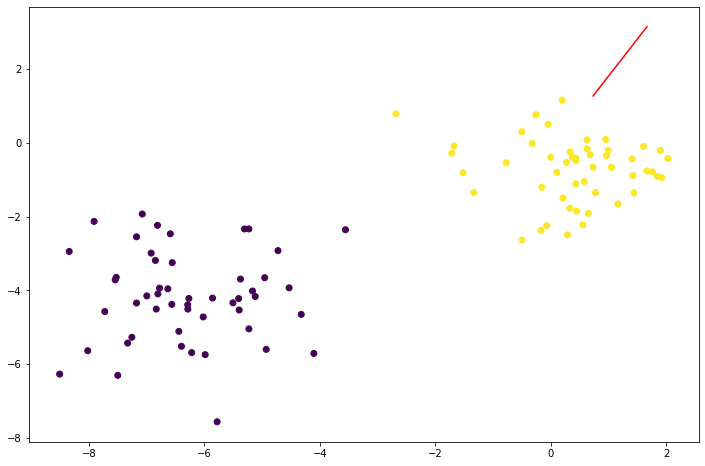

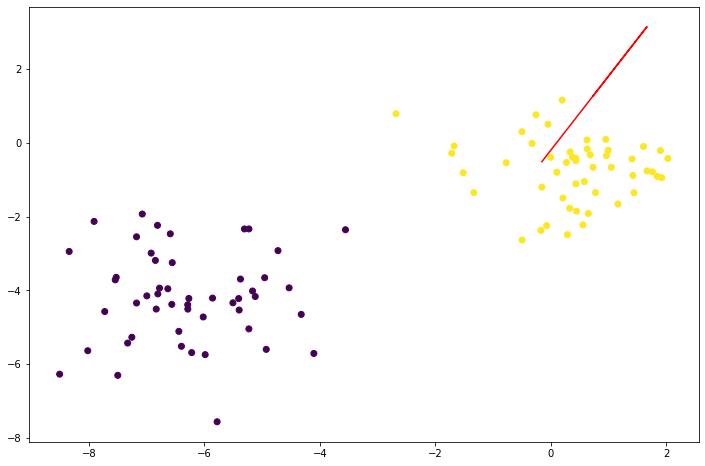

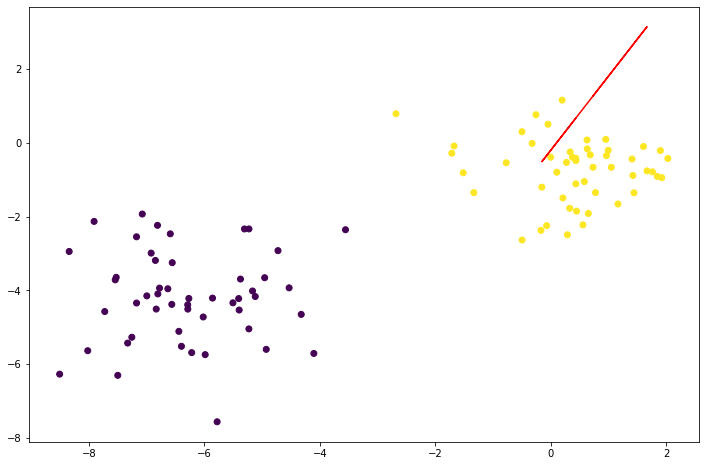

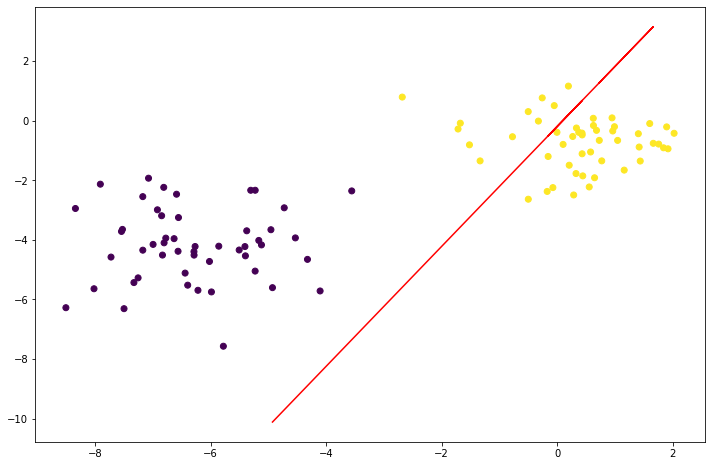

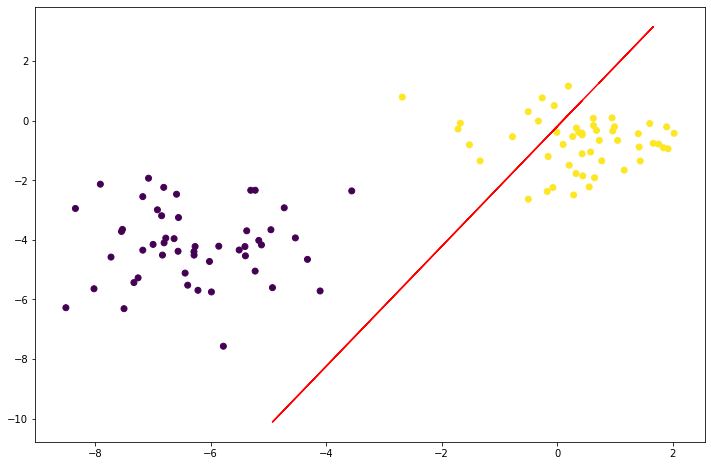

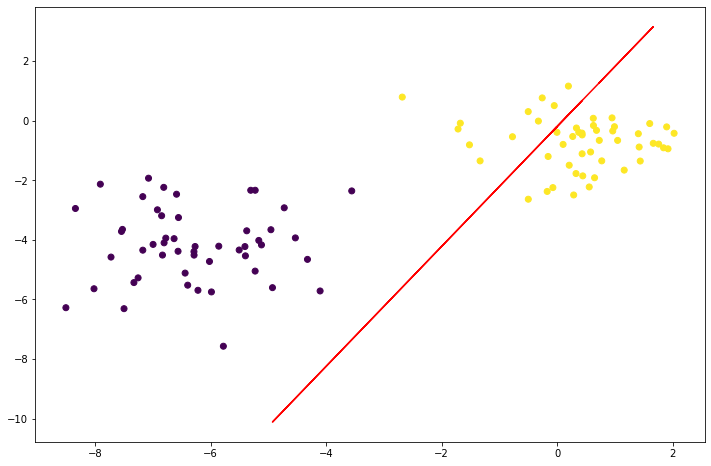

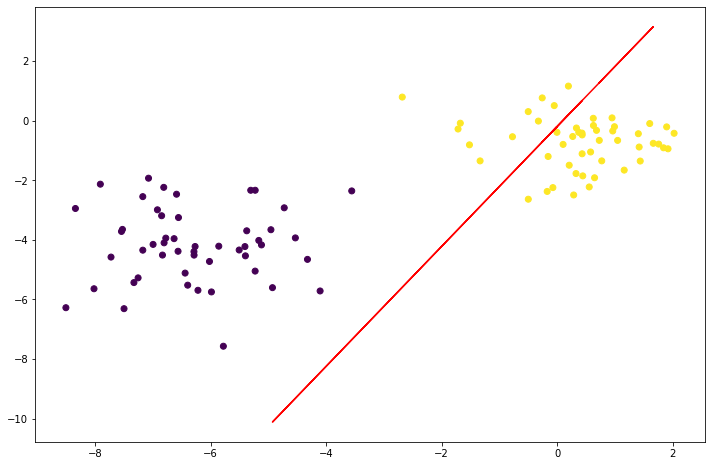

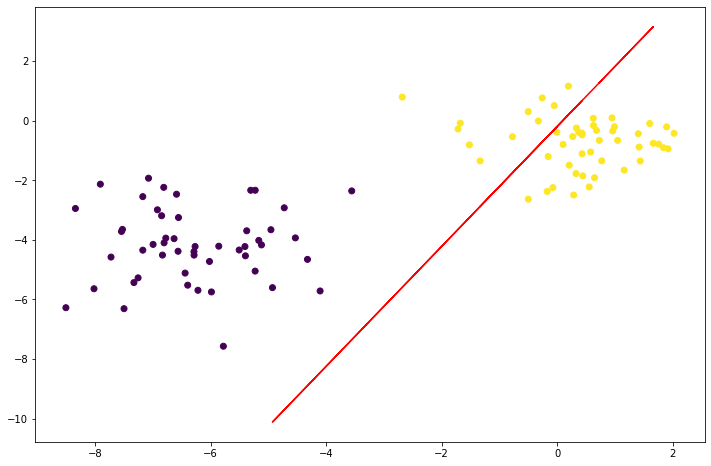

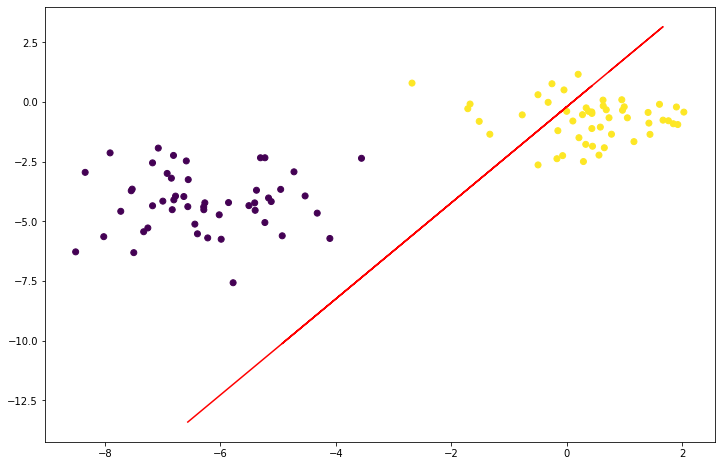

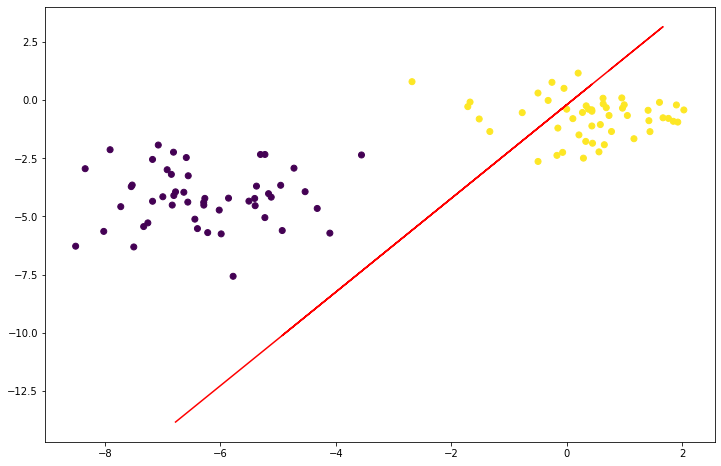

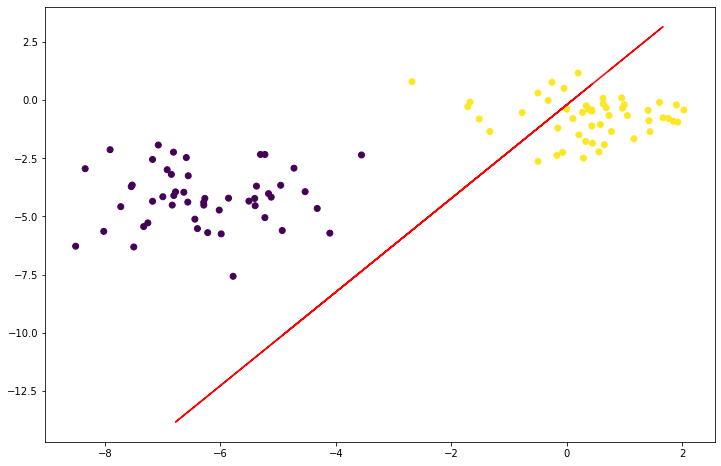

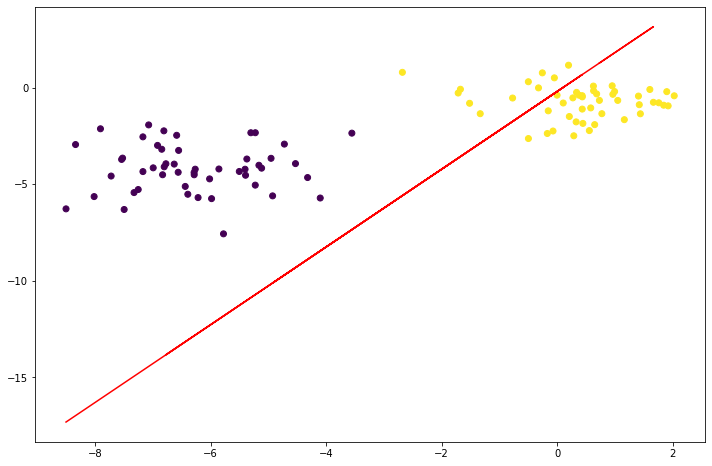

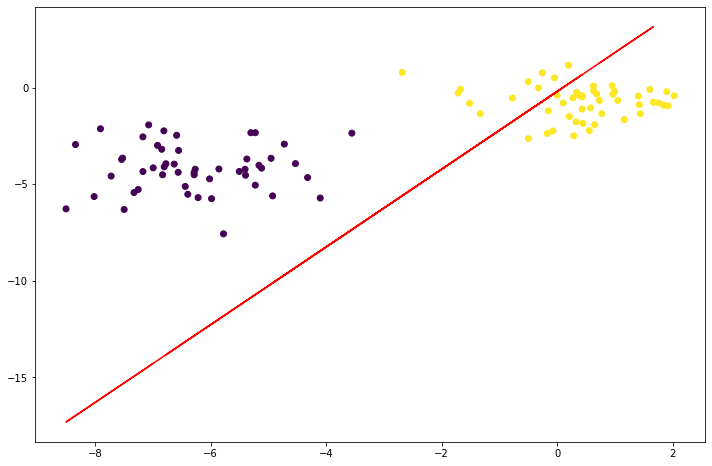

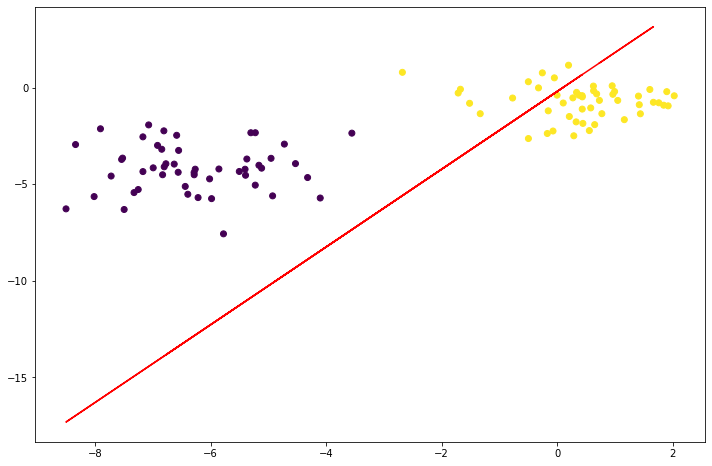

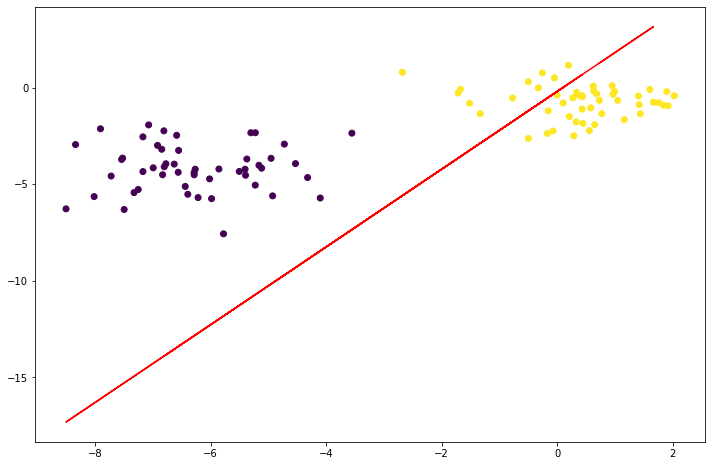

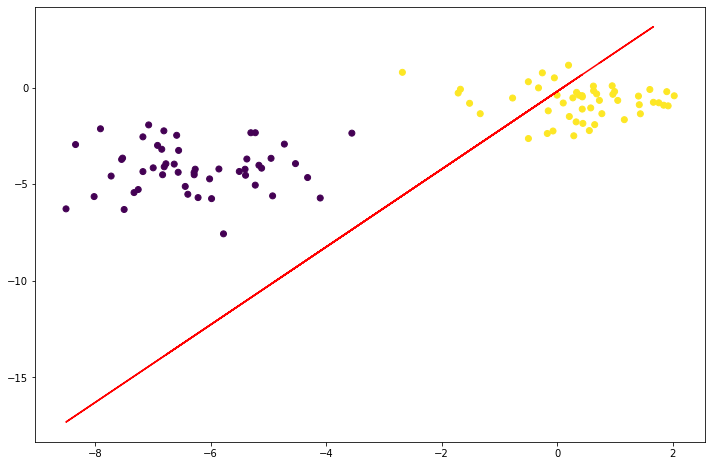

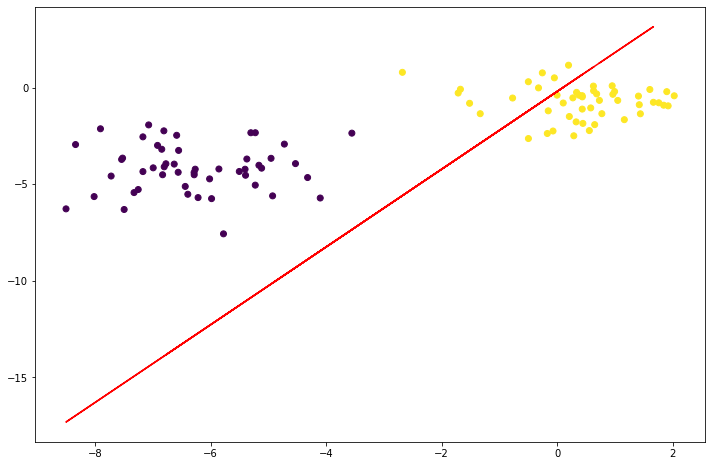

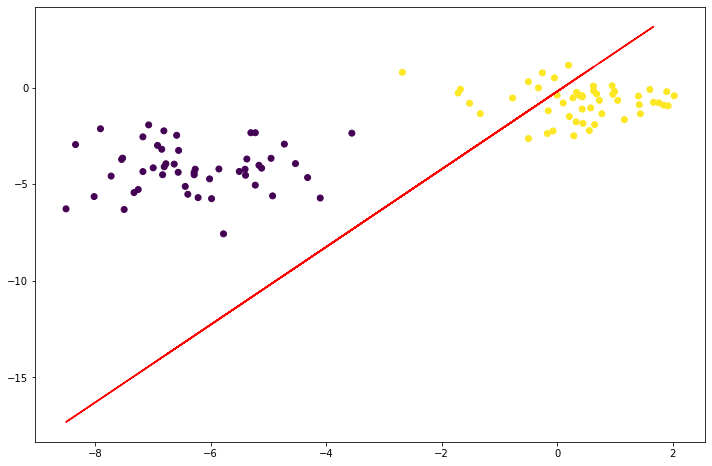

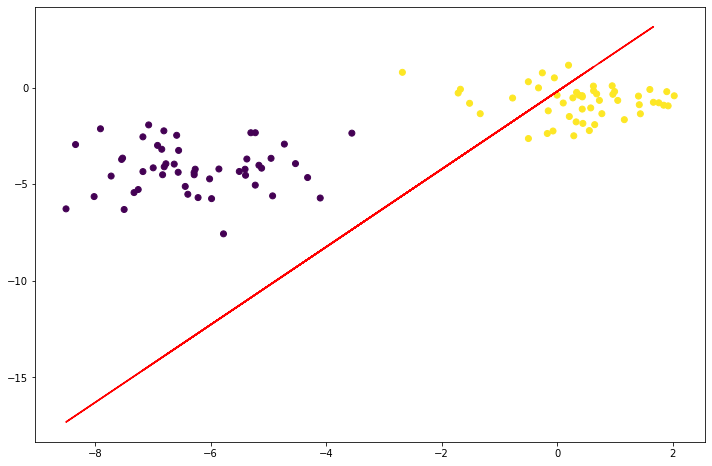

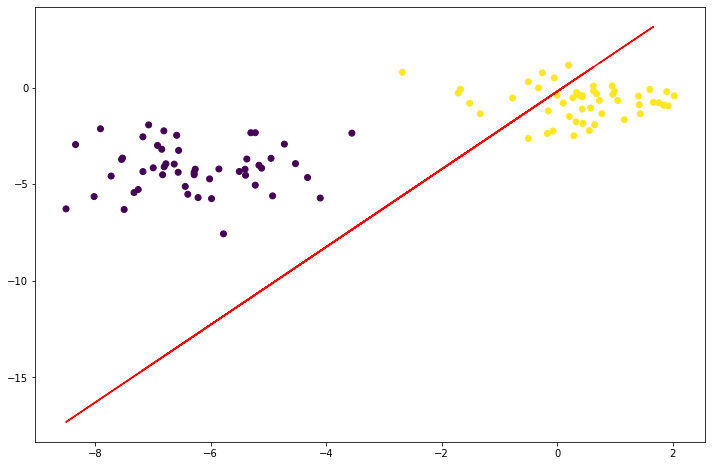

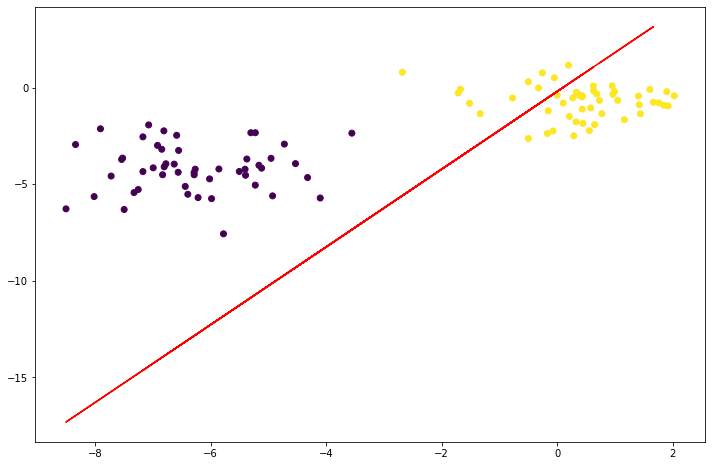

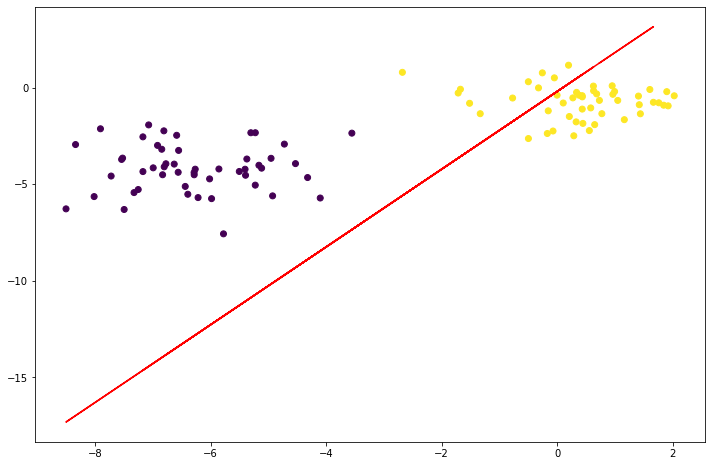

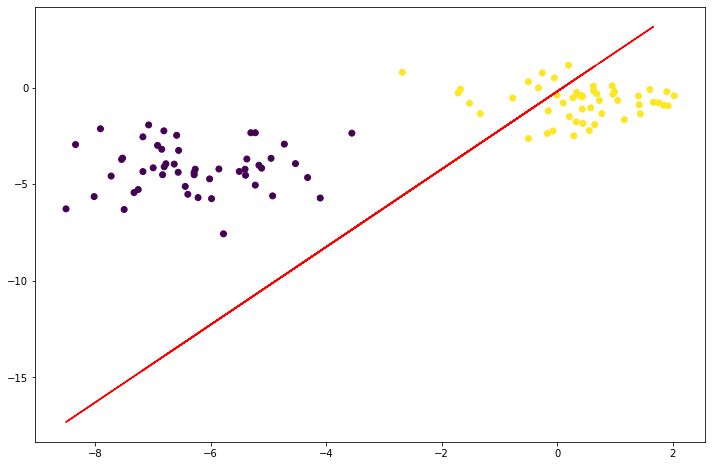

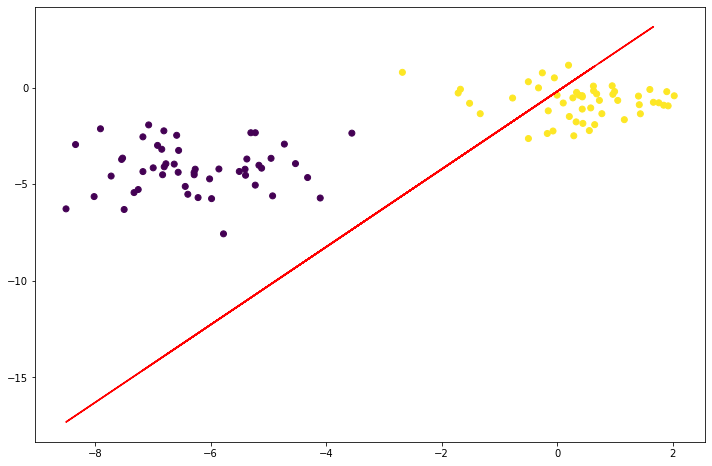

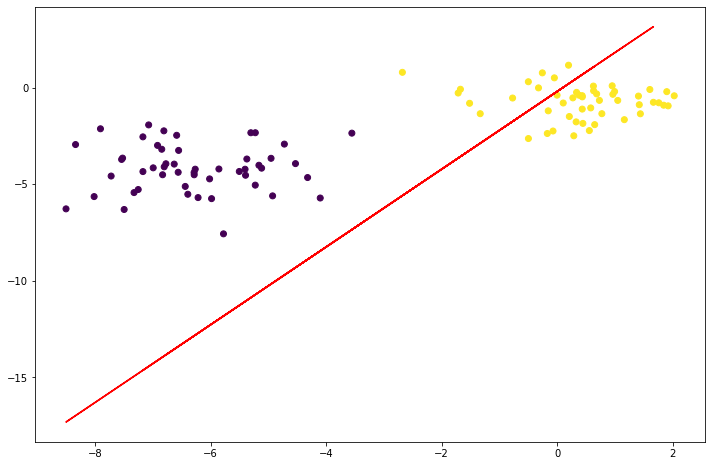

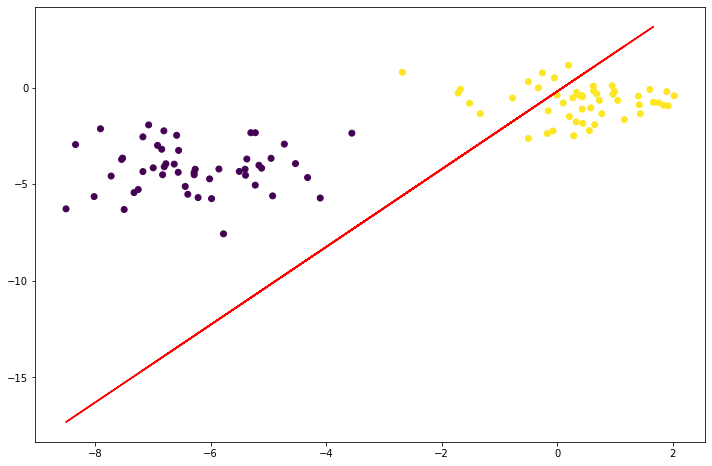

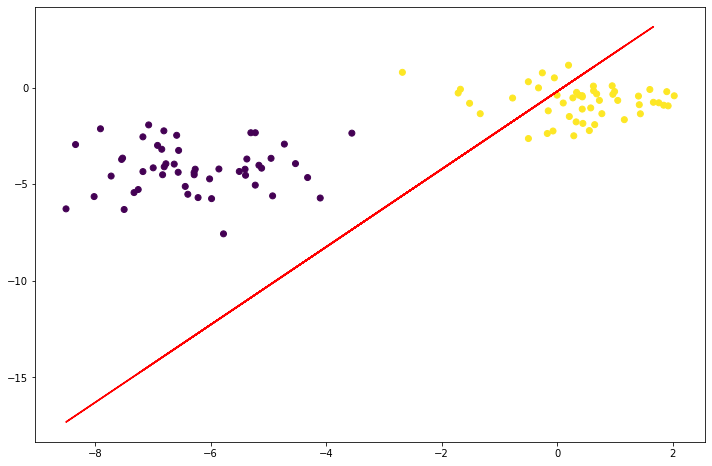

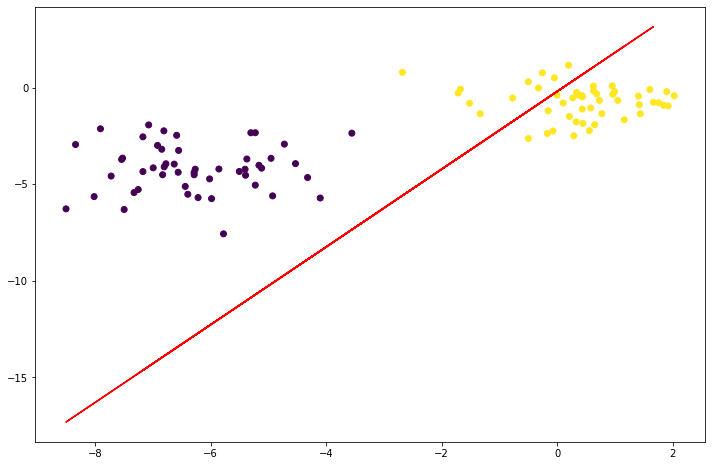

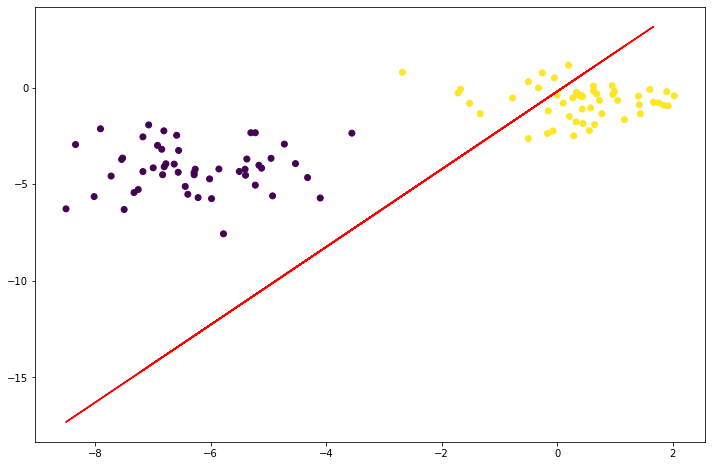

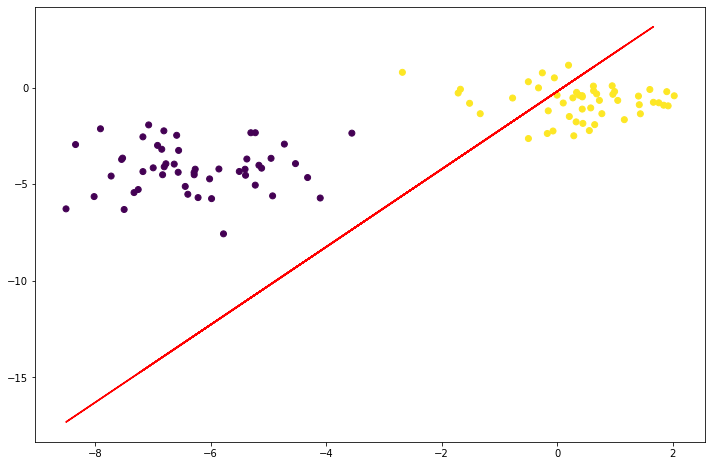

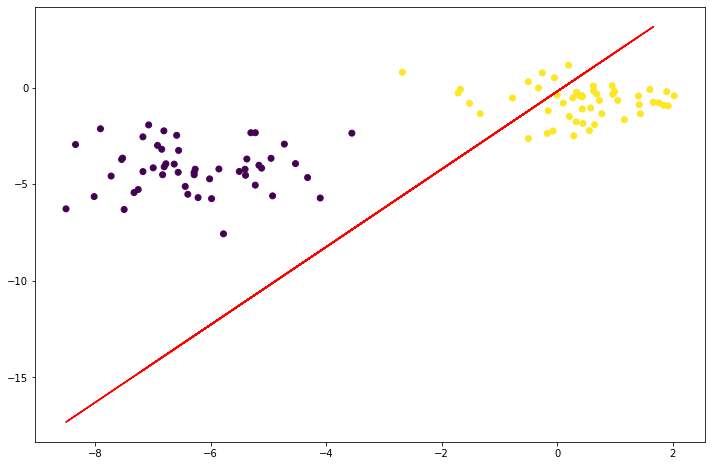

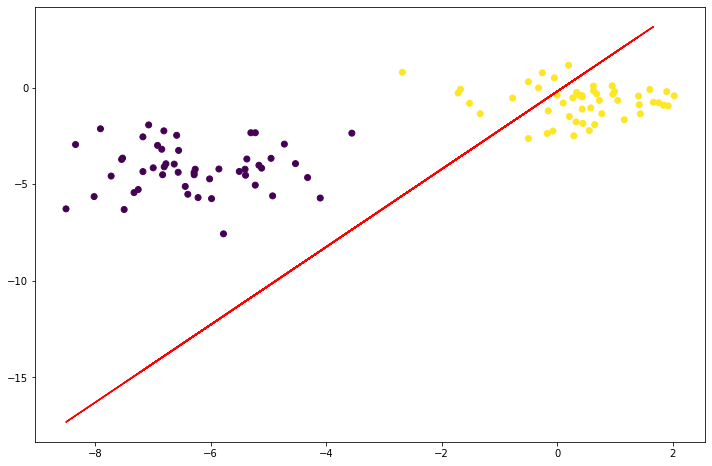

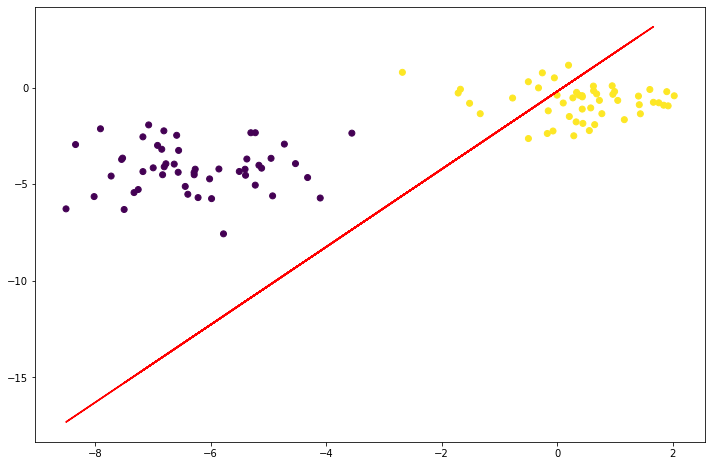

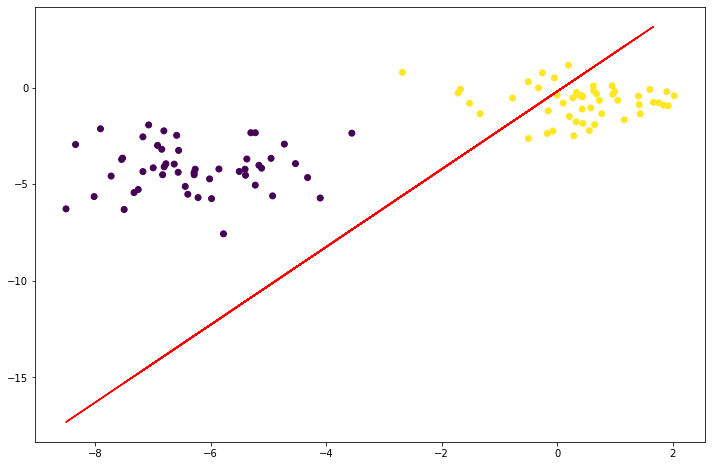

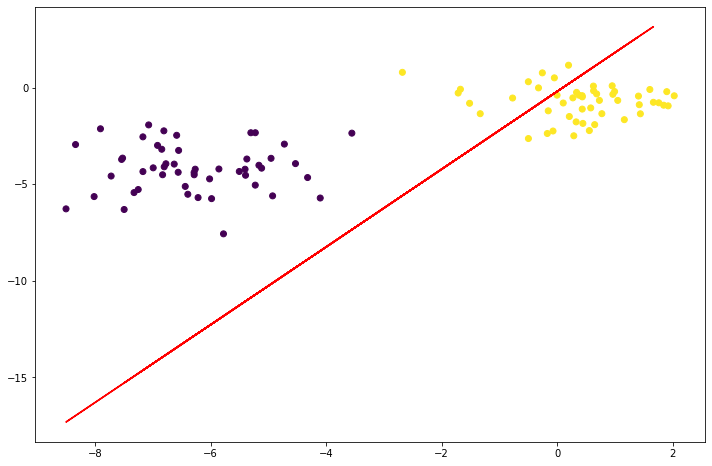

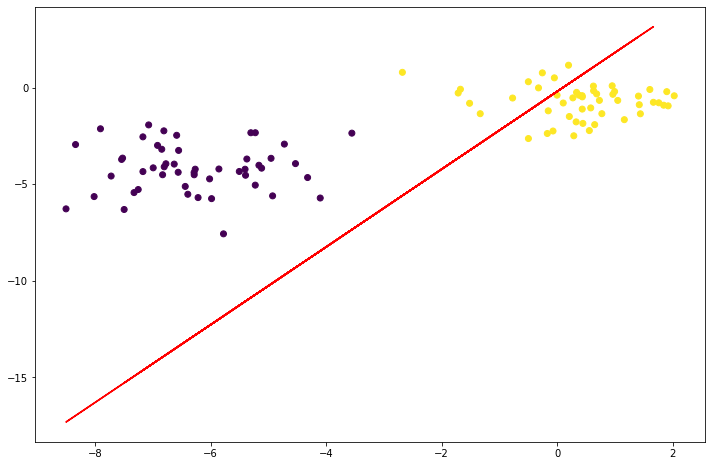

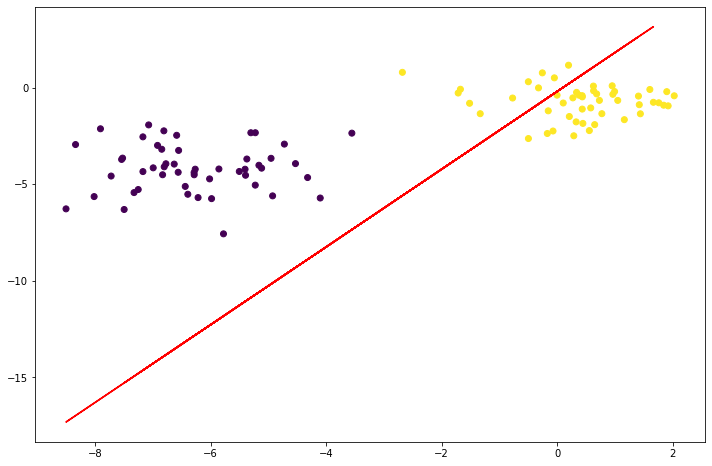

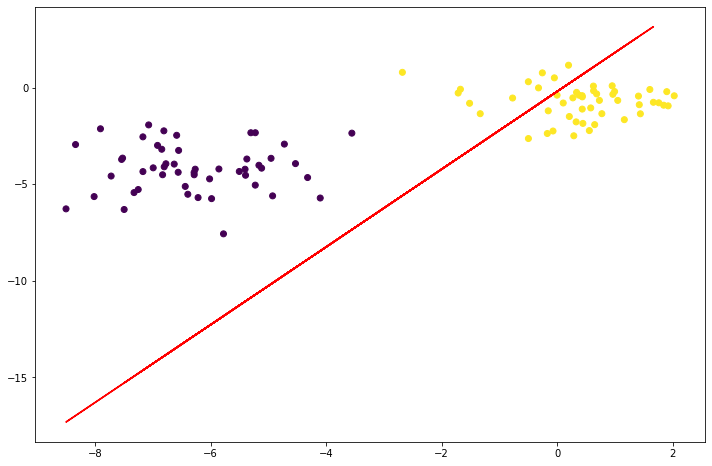

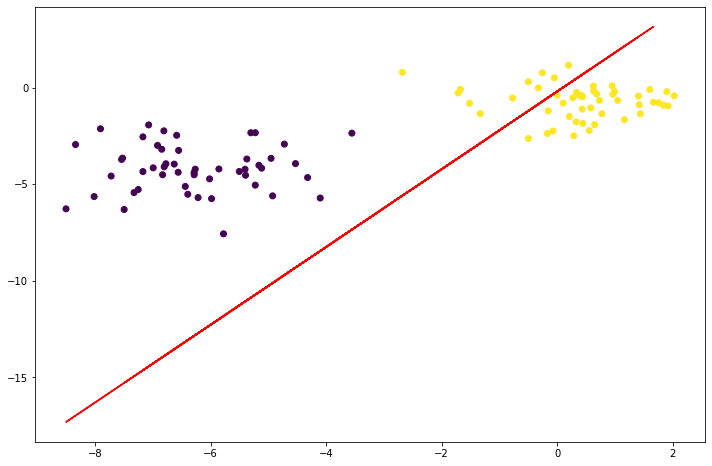

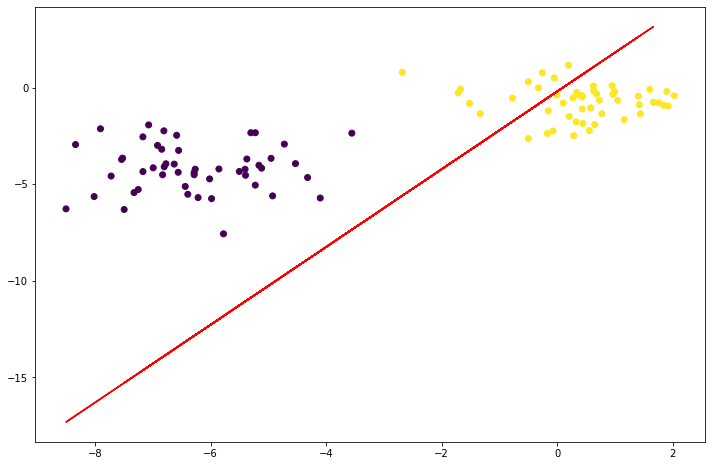

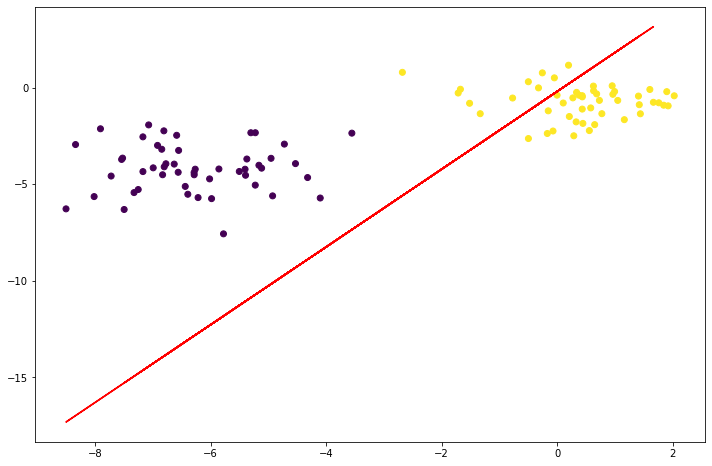

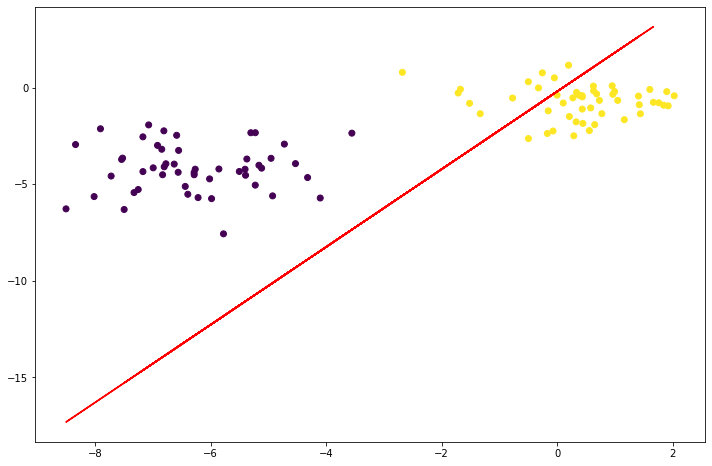

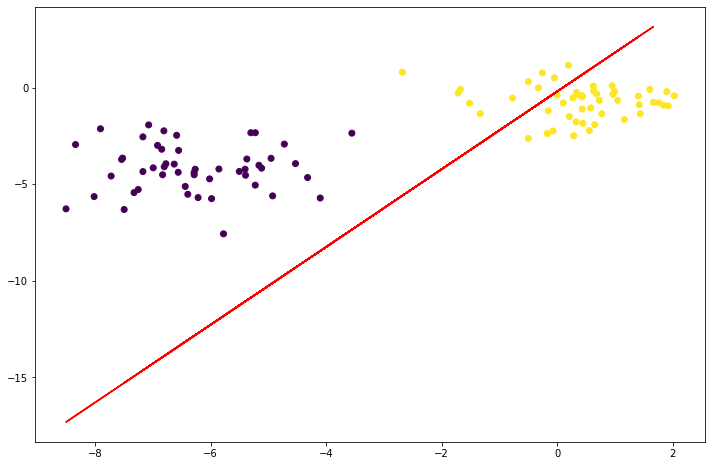

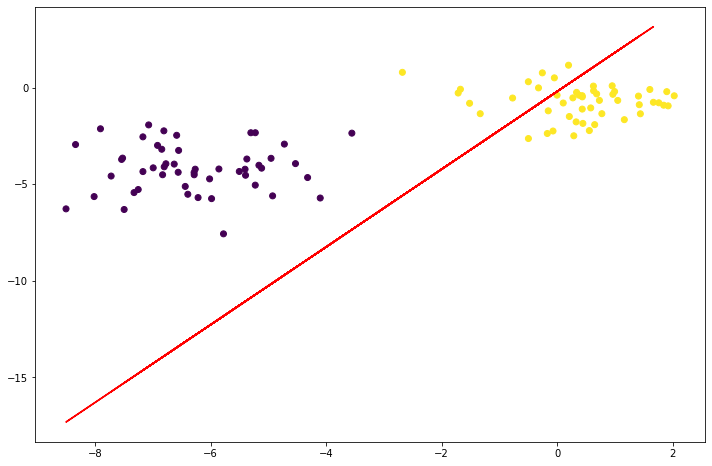

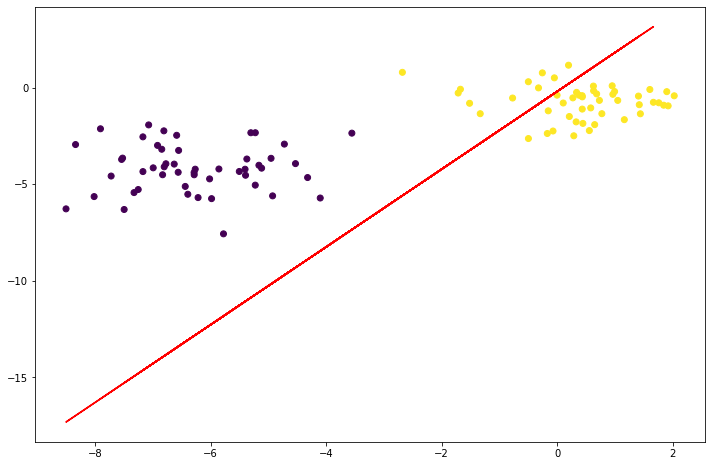

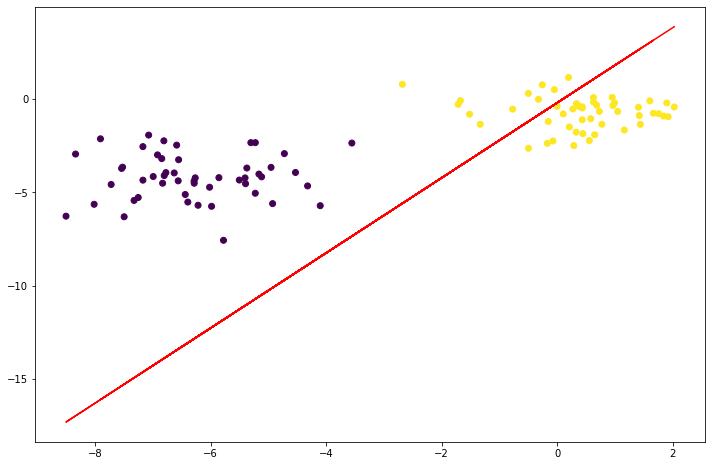

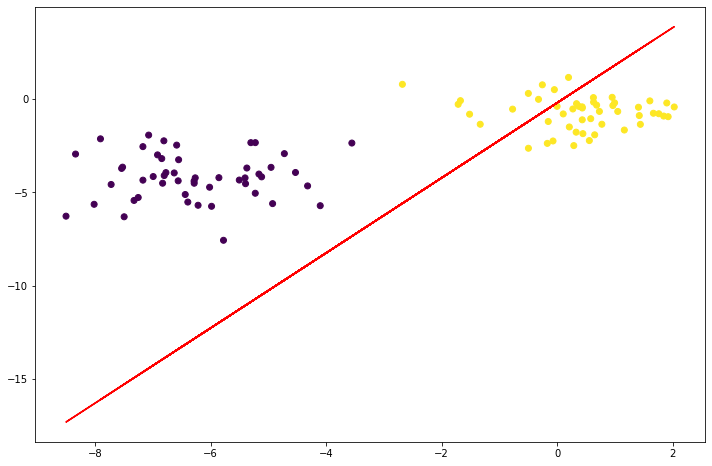

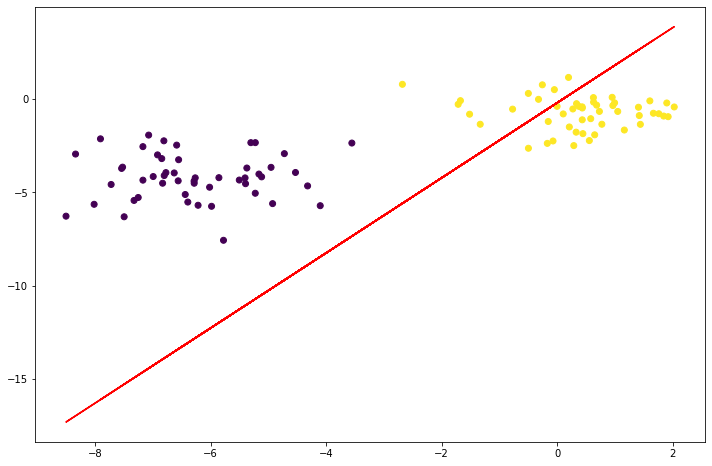

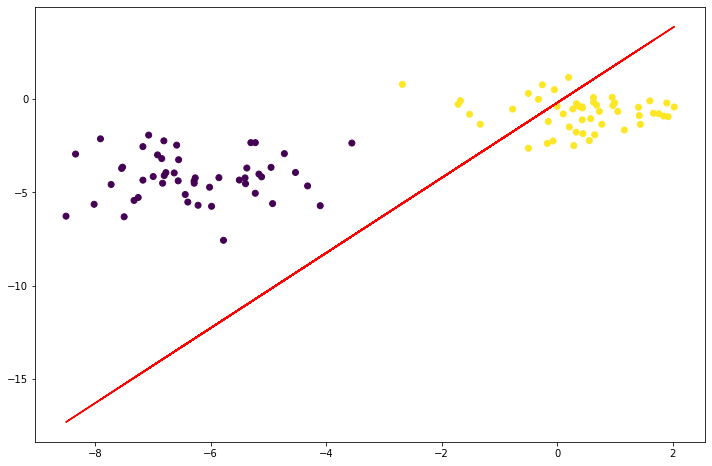

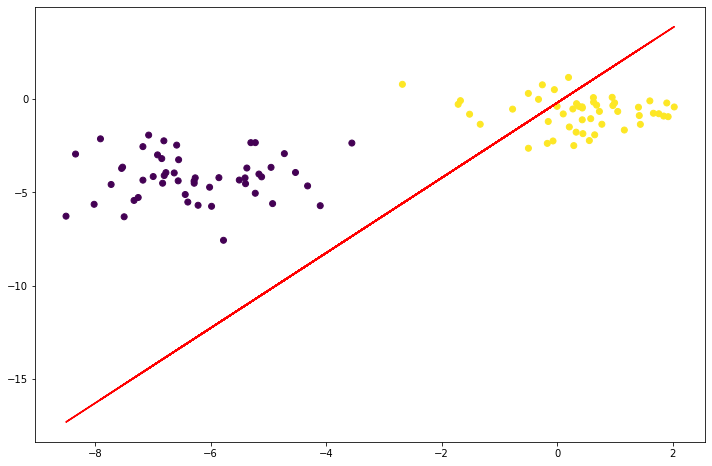

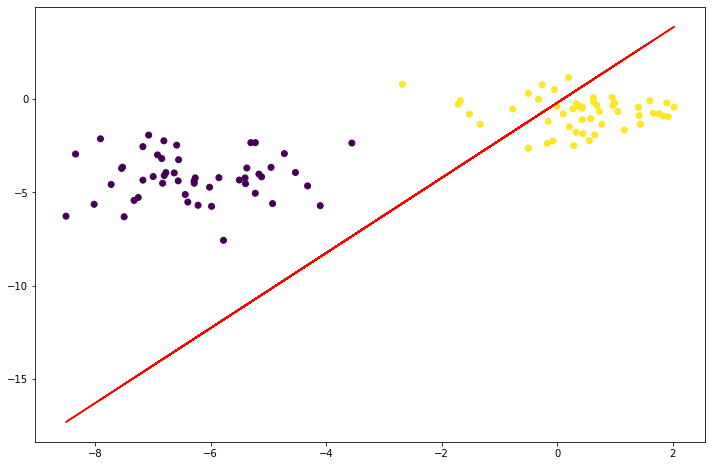

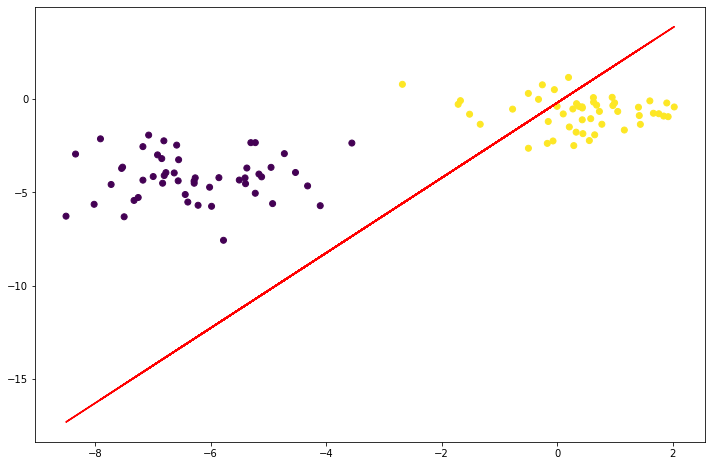

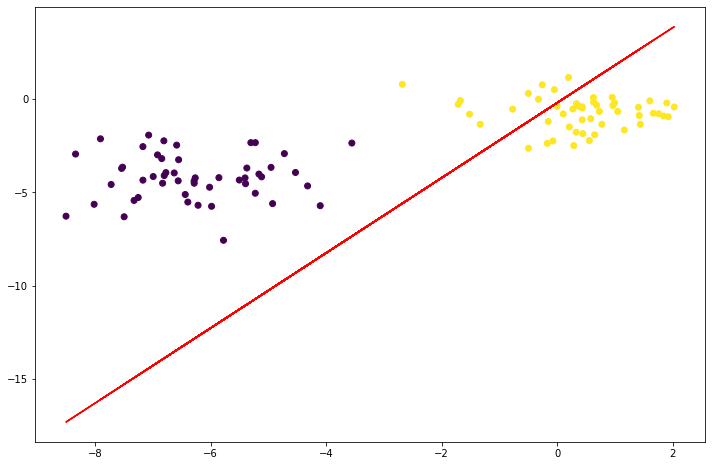

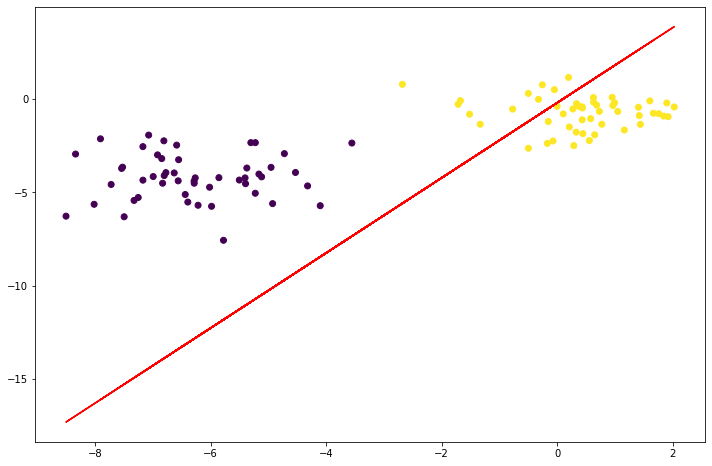

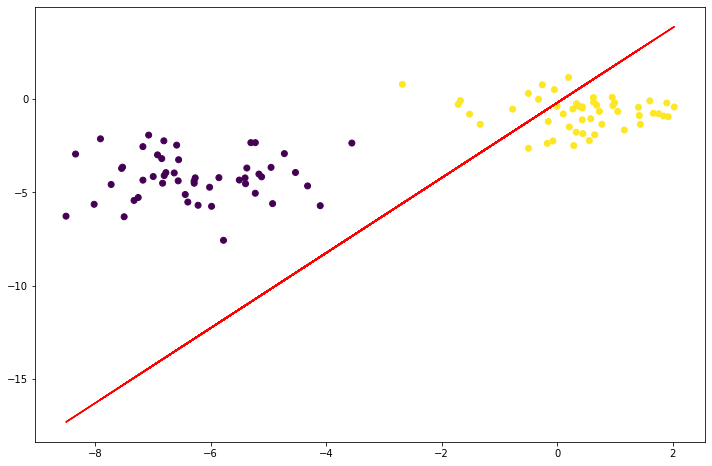

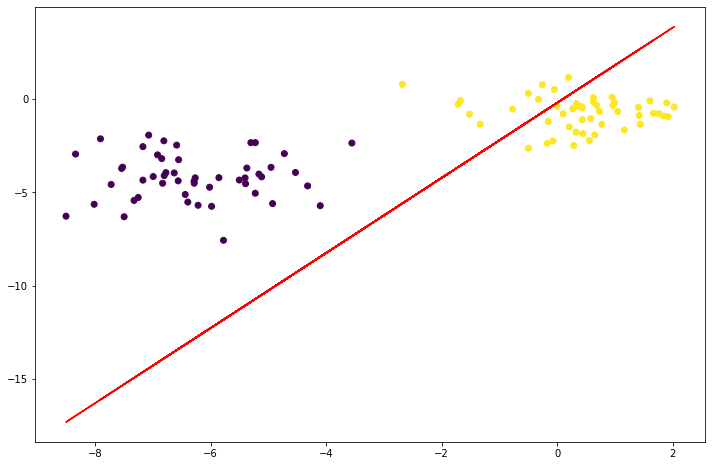

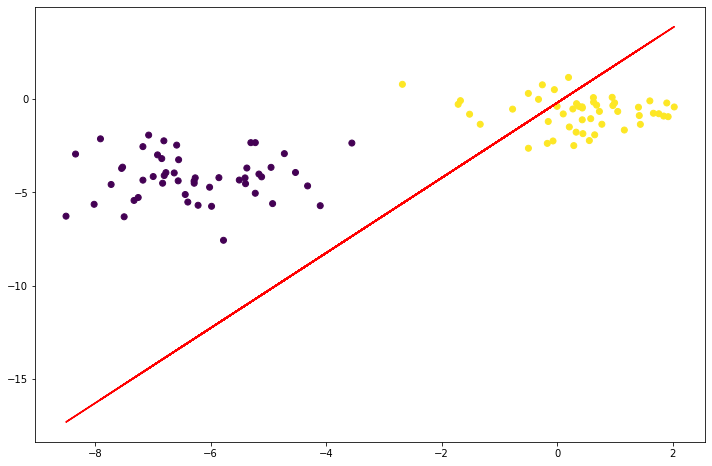

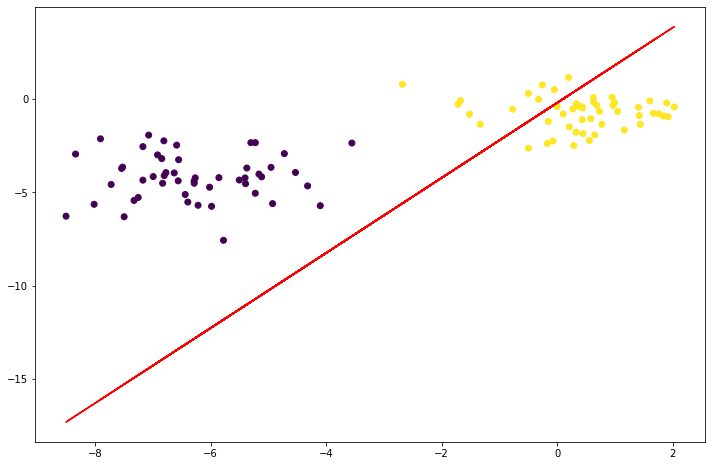

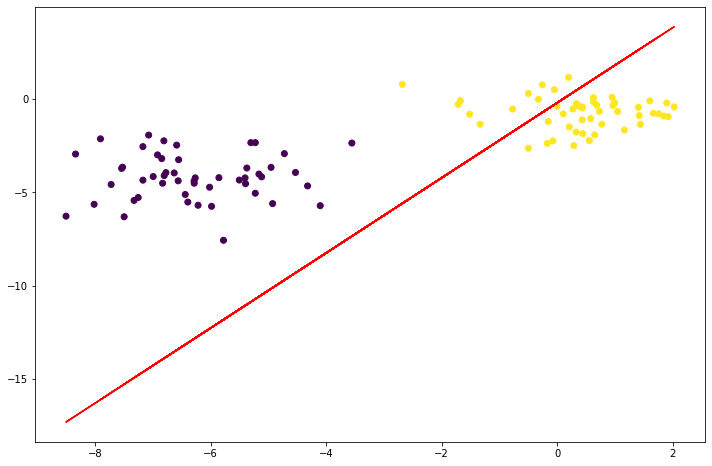

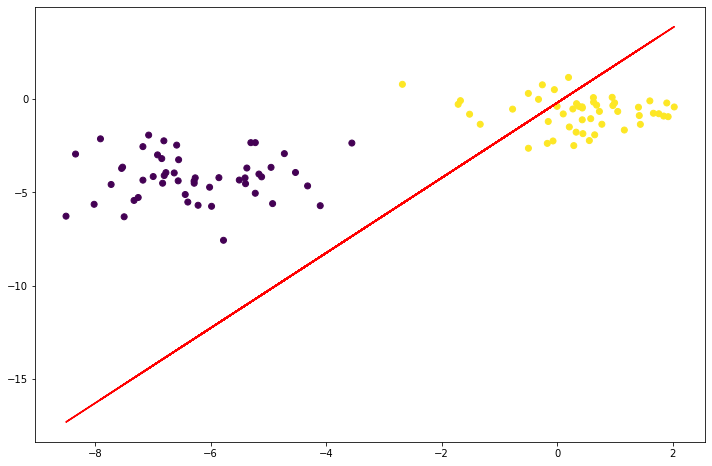

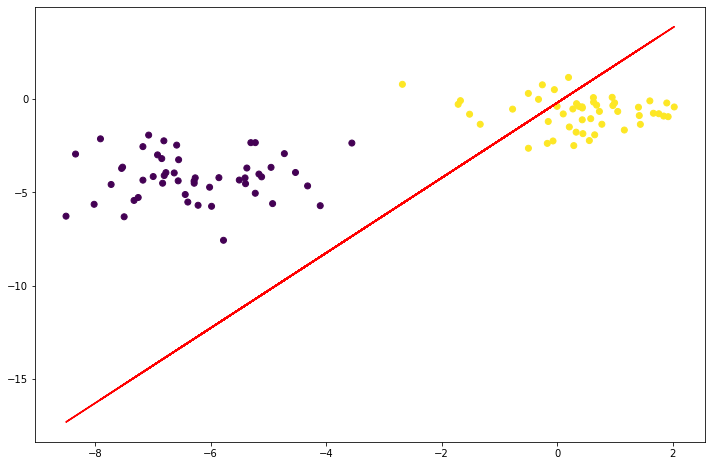

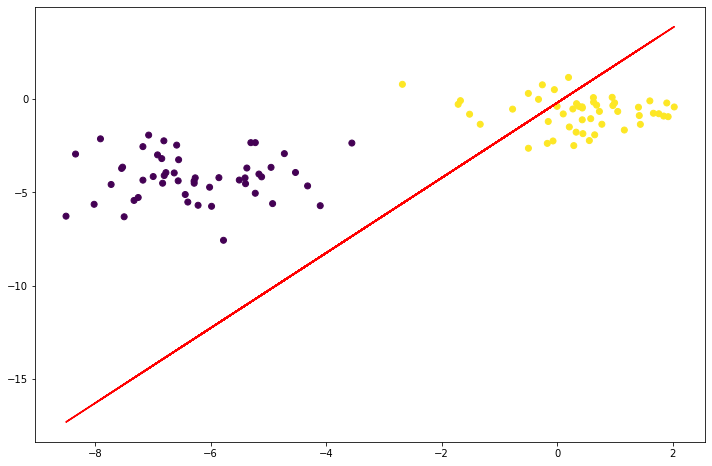

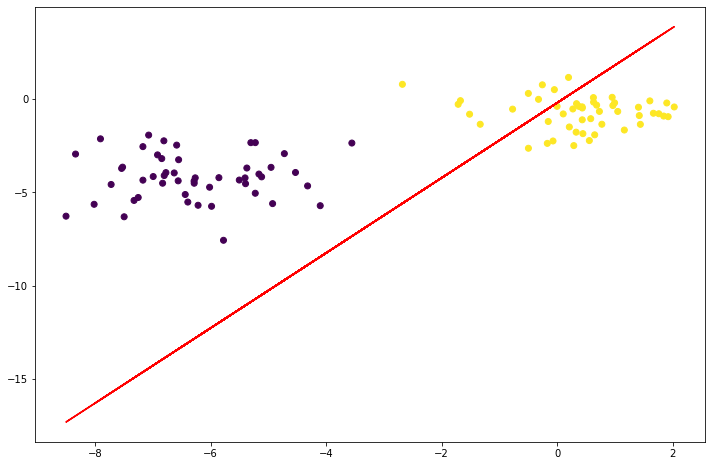

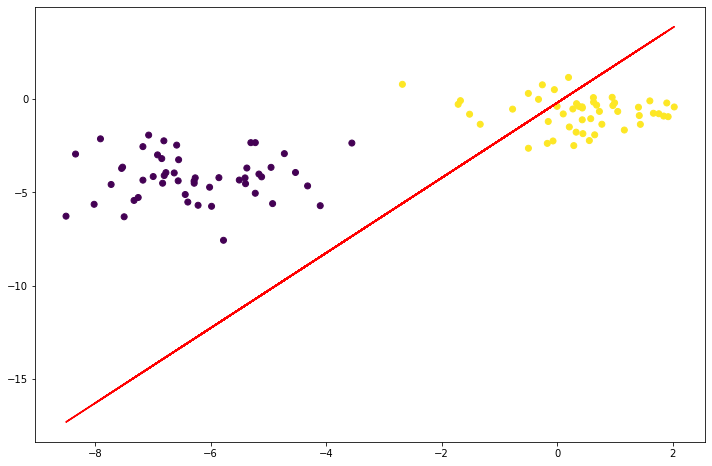

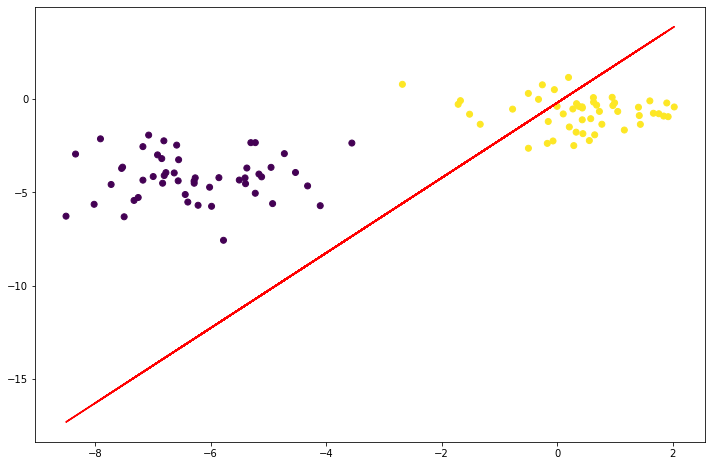

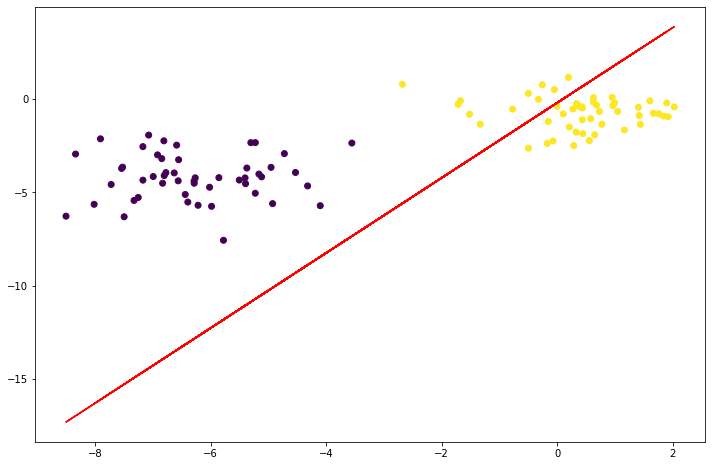

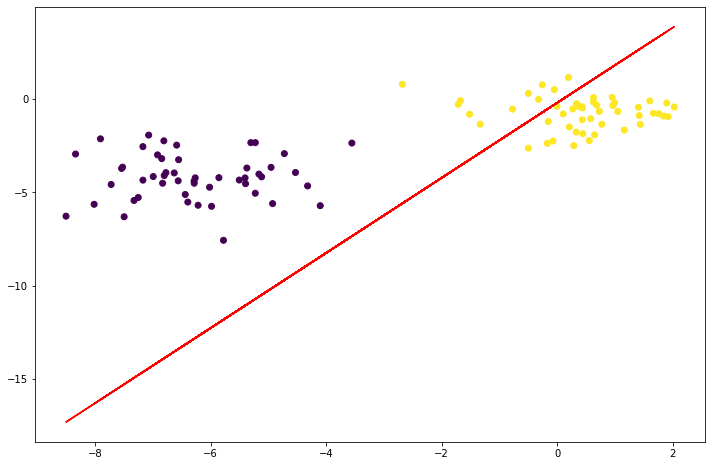

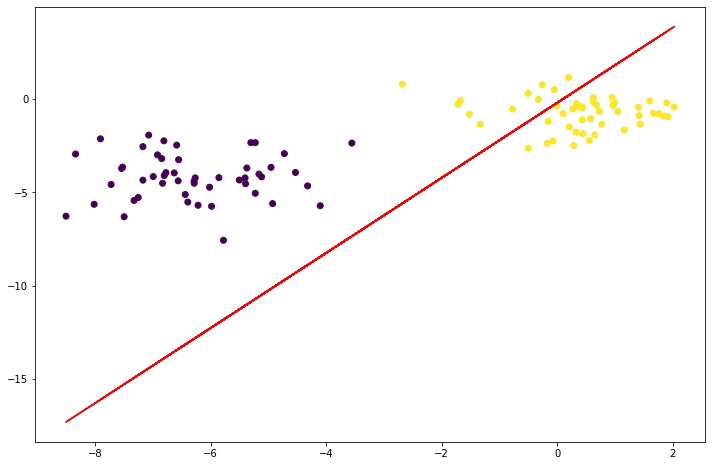

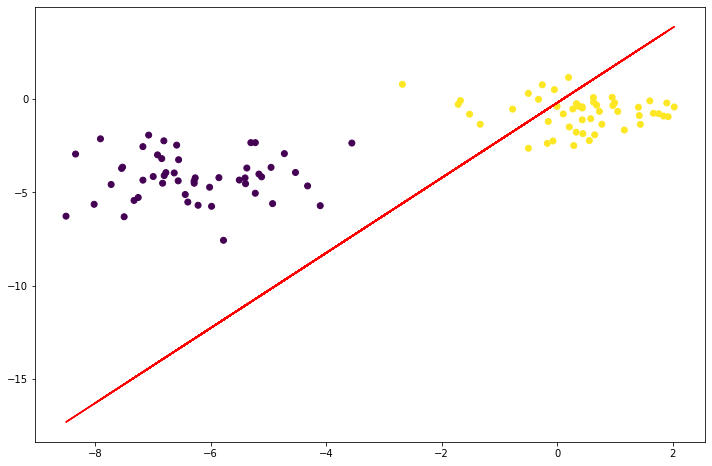

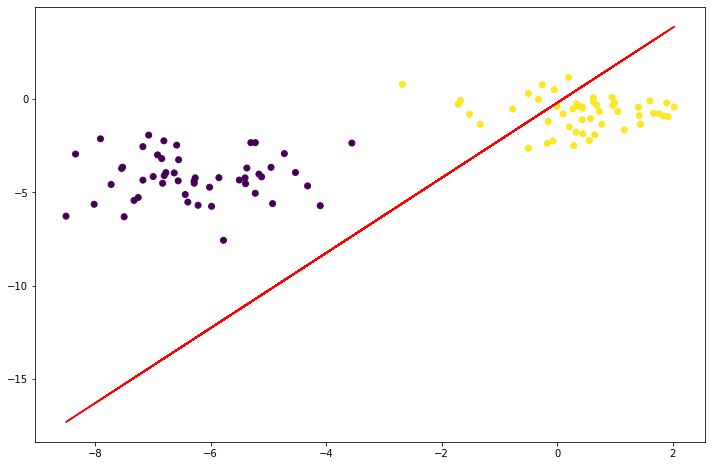

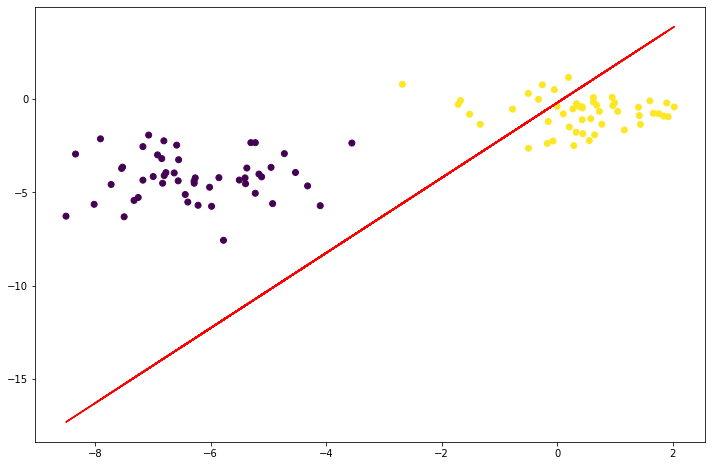

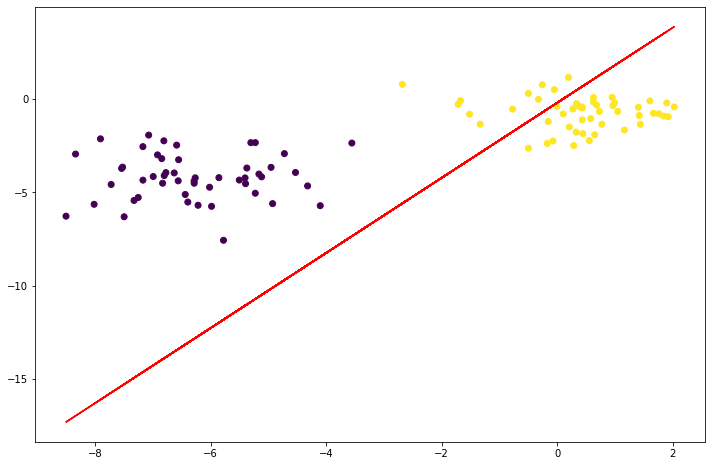

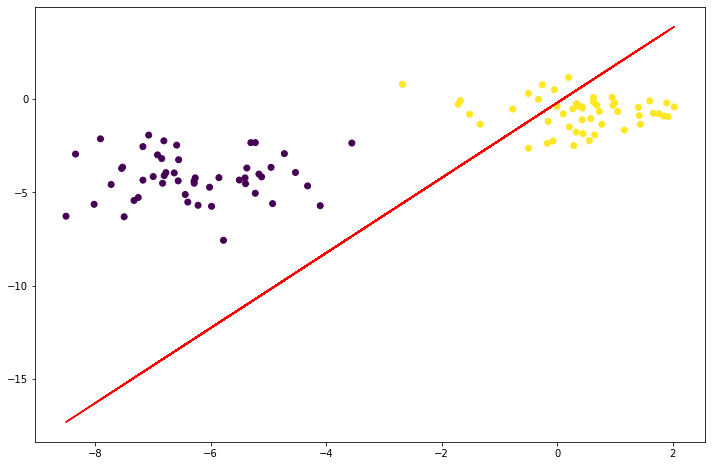

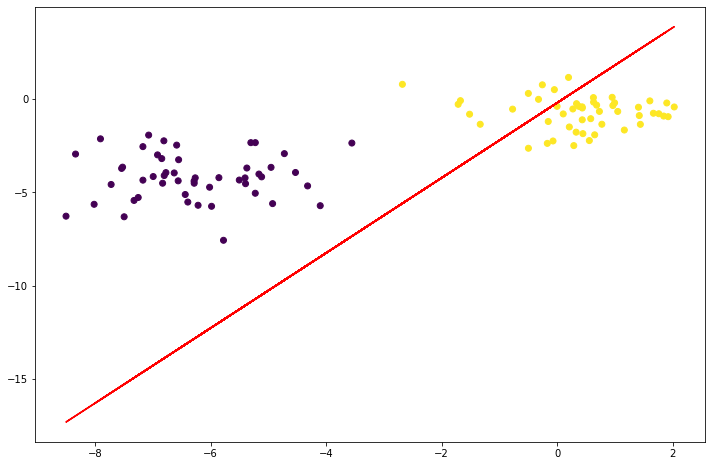

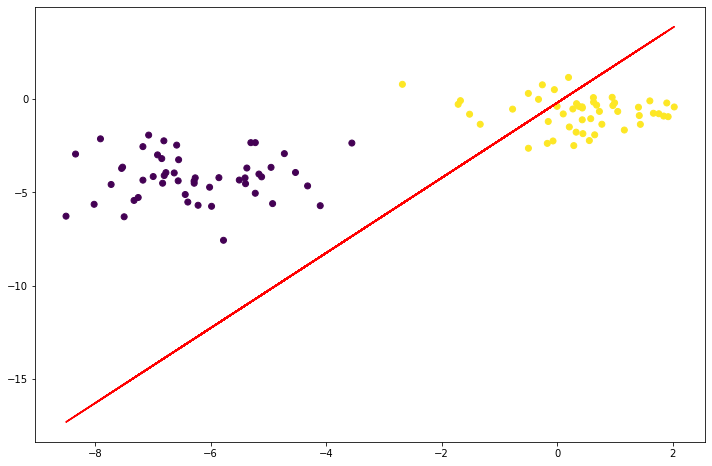

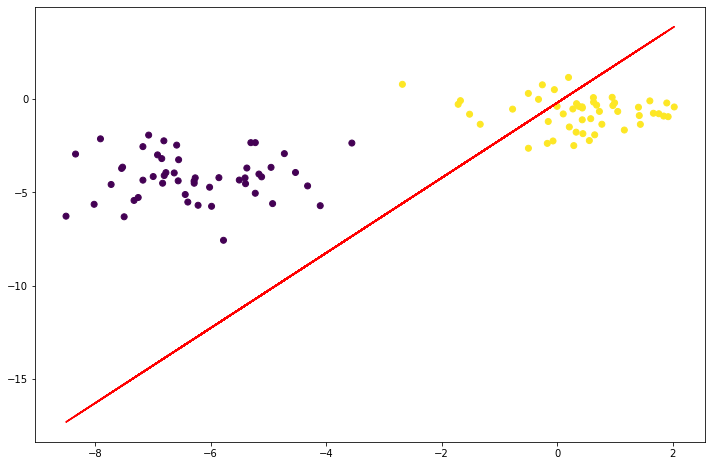

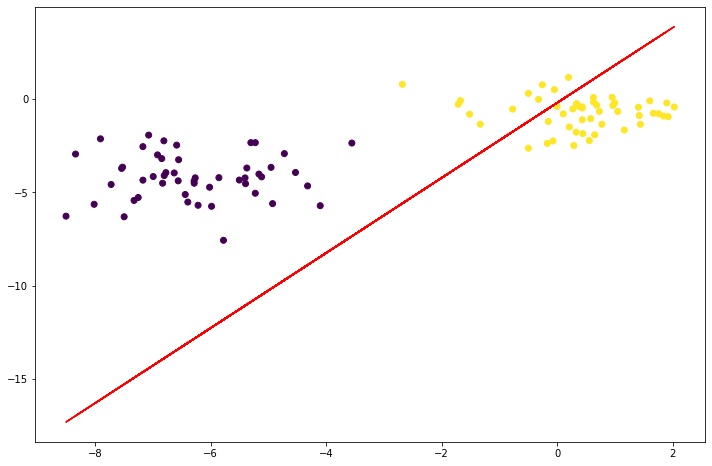

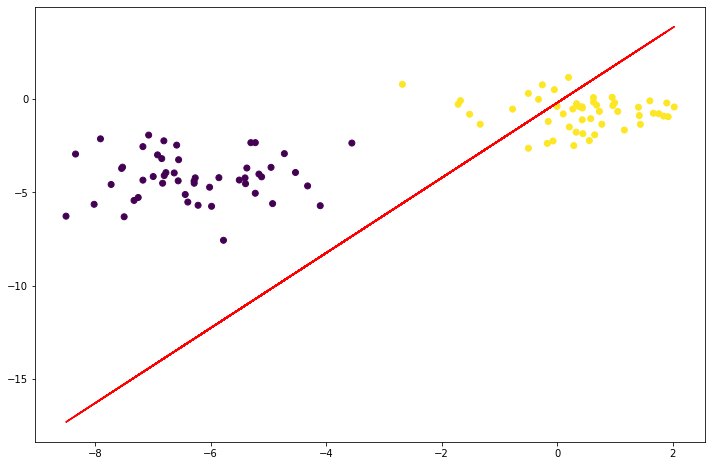

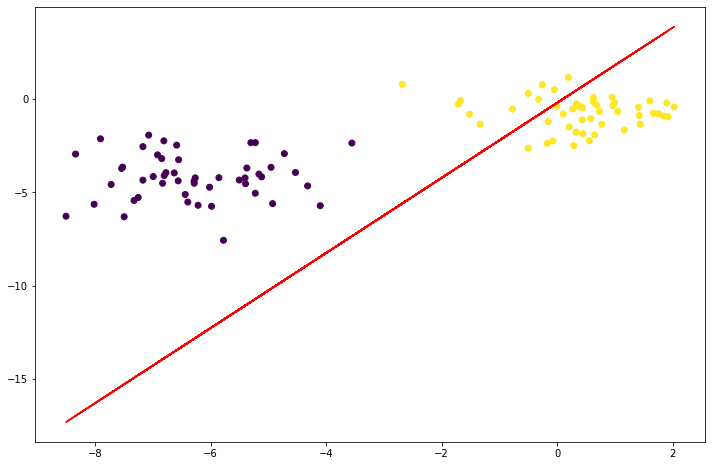

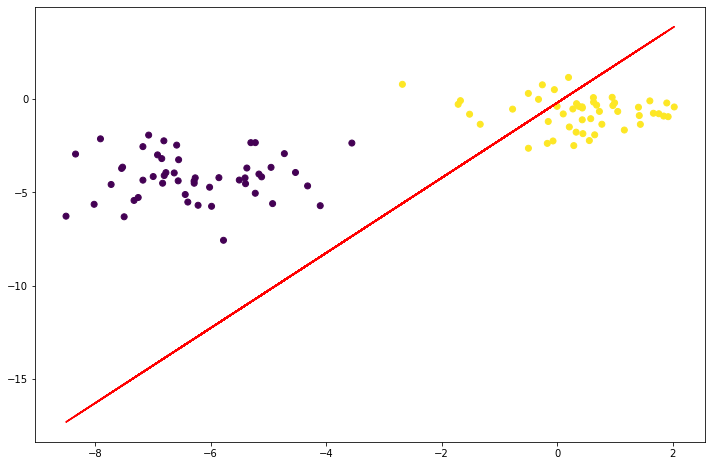

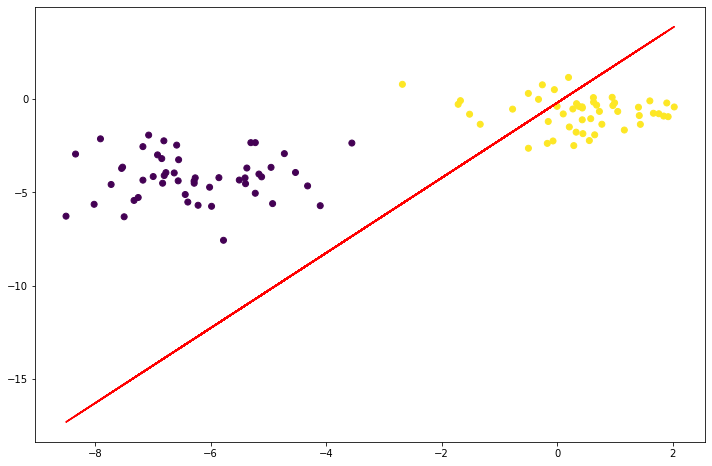

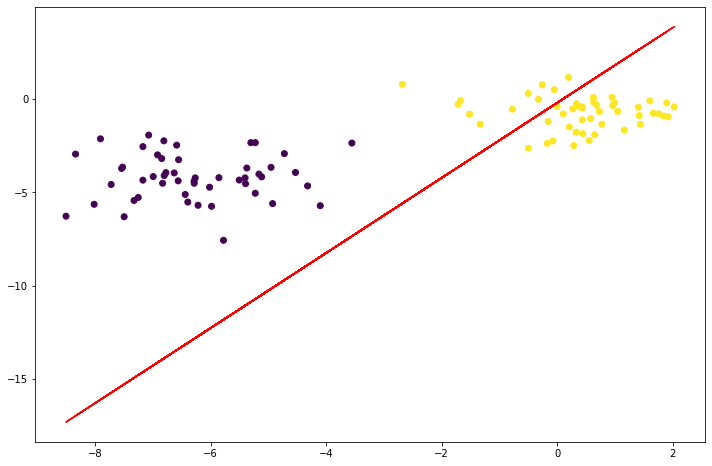

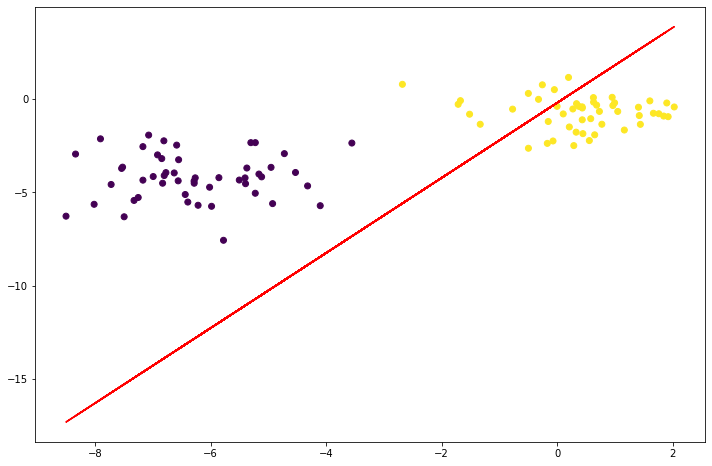

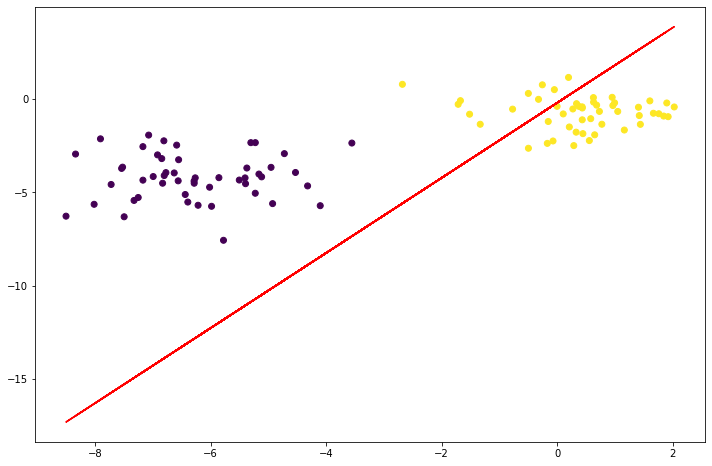

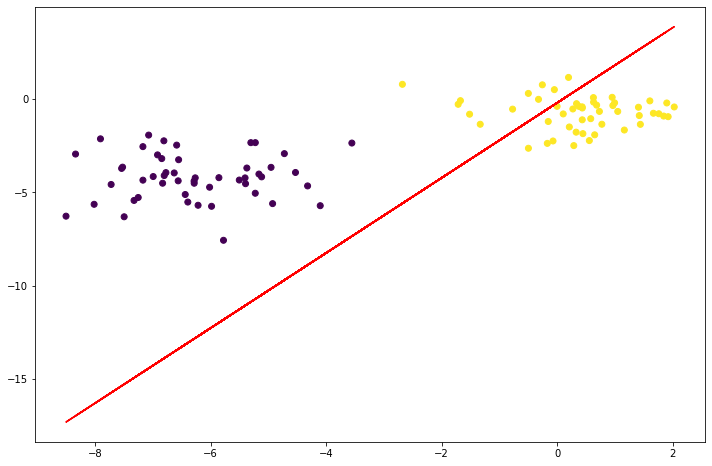

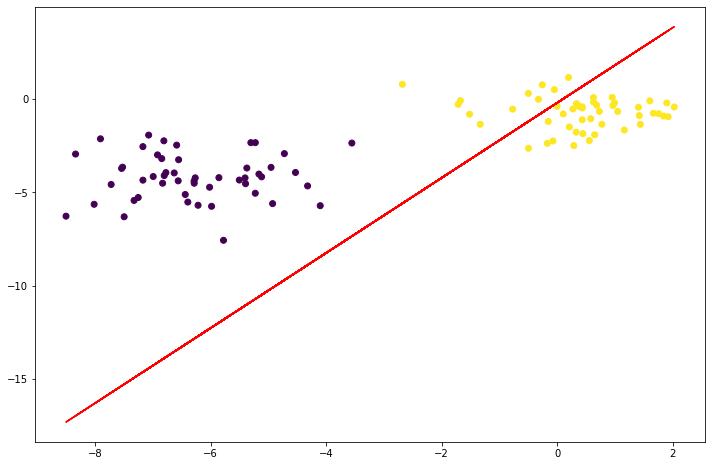

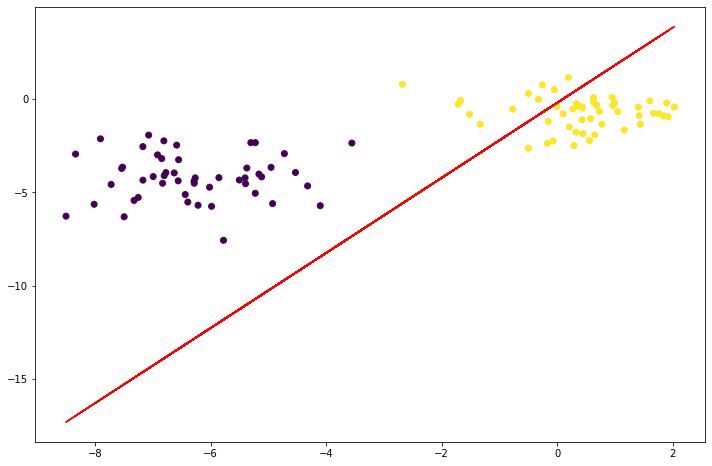

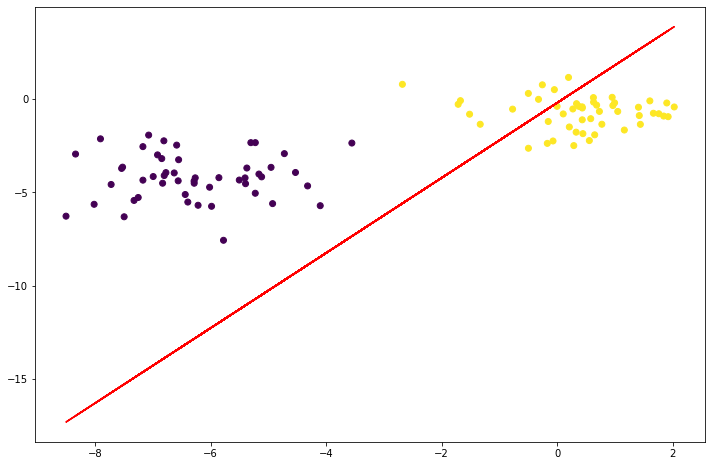

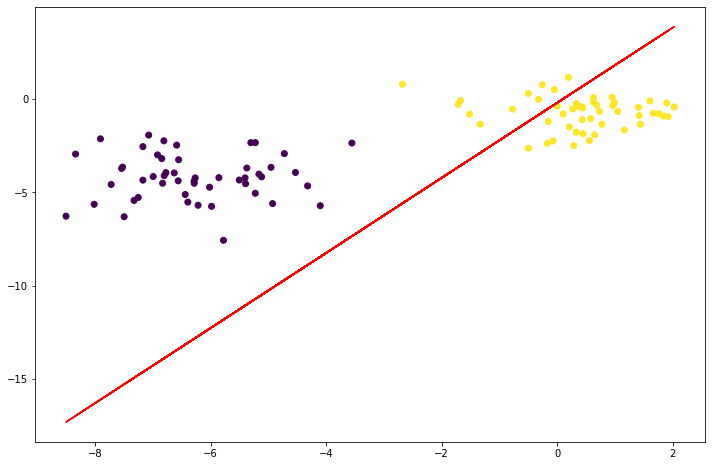

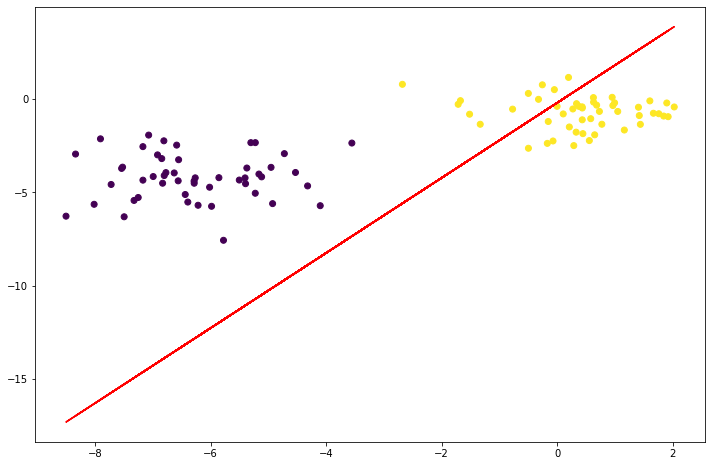

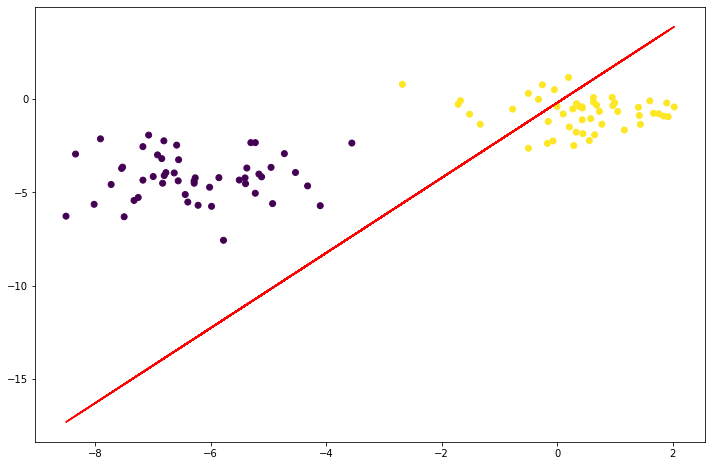

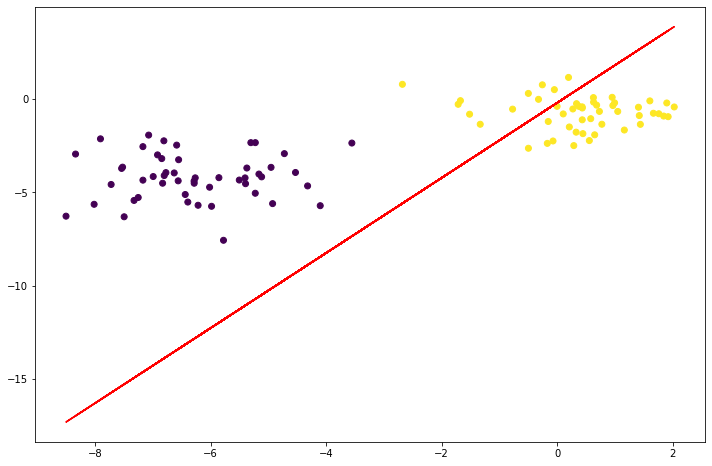

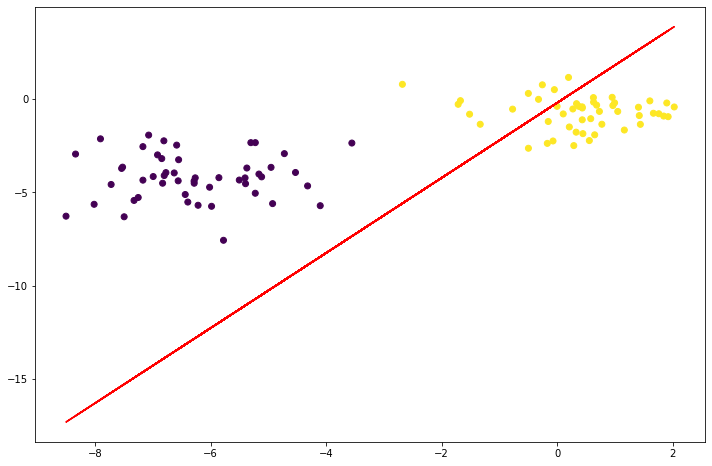

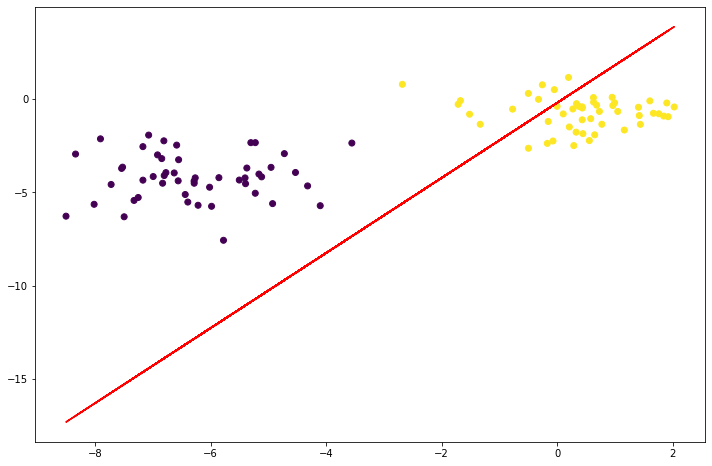

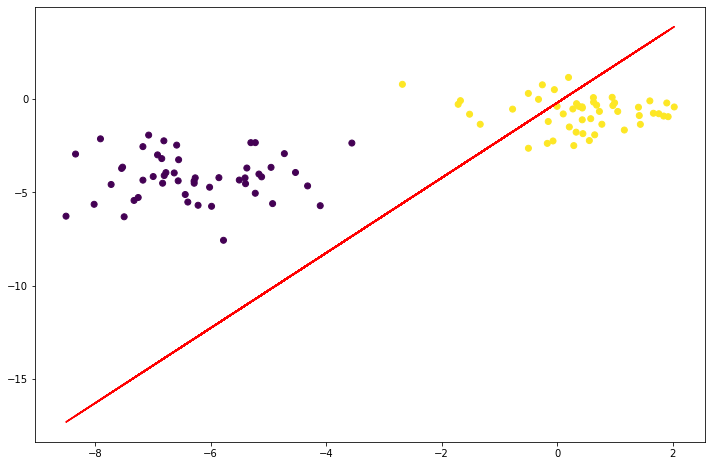

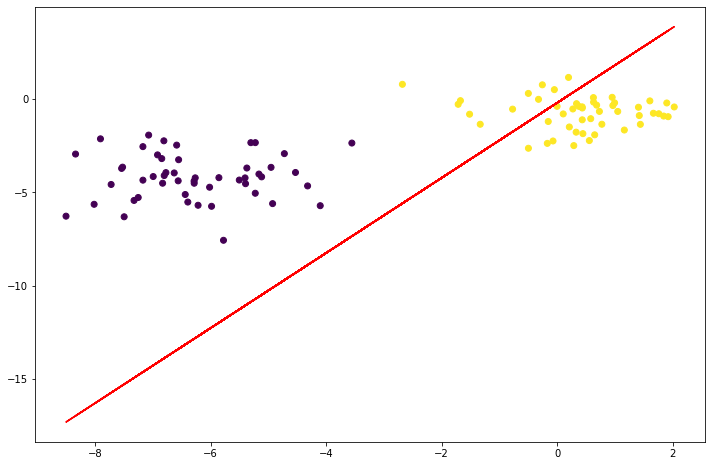

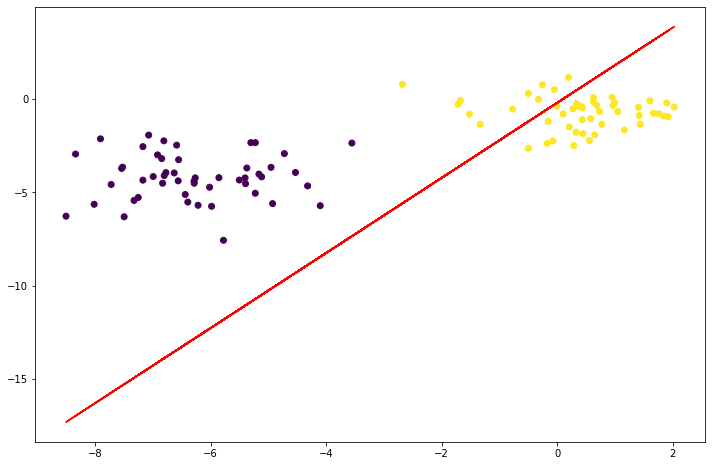

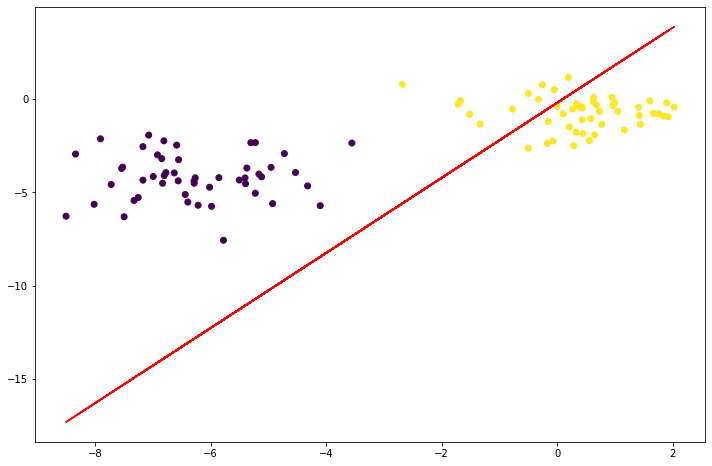

In [49]:
output,w,outX,outY = perceptron(X, y, 0.01, 10) 